<a href="https://colab.research.google.com/github/Zapcekreka/diplomski/blob/main/Dipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [ ]:
train_csv=pd.read_csv("drive/MyDrive/Znaci/Train.csv")
test_csv=pd.read_csv("drive/MyDrive/Znaci/Test.csv")

In [ ]:
train_csv.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [ ]:
test_csv.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [ ]:
from google.colab import output 
def ucitaj_slike(csv_file,visina,sirina):

  putanje=list("drive/MyDrive/Znaci/"+csv_file["Path"])

  slike=[]
  
  labele=[]

  m=len(putanje)


  for i in range(m) :
    putanja=putanje[i]
    slika=Image.open(putanja)
    slika=slika.resize((visina,sirina))
    slika=np.array(slika)
    slike.append(slika)
    labela=csv_file["ClassId"][i]
    labele.append(labela)
    print("Ucitana je {}. slika.".format(i))
    output.clear()  


  slike=np.array(slike)
  labele=np.array(labele)

  print("Ucitavanje slika je zavrseno!")

  labele=labele.reshape(1,m)

  return slike,labele

In [ ]:
slike_train,labele_train=ucitaj_slike(train_csv,30,30)

Ucitavanje slika je zavrseno!


In [ ]:
slike_train,labele_train=ucitaj_slike(train_csv,30,30)

Ucitavanje slika je zavrseno!


In [ ]:
print(slike_train.shape)

(39209, 30, 30, 3)


In [ ]:
print(labele_train.shape)

(1, 39209)


In [ ]:
slike_test,labele_test=ucitaj_slike(test_csv,30,30)

Ucitavanje slika je zavrseno!


In [ ]:
print(slike_test.shape)

(12630, 30, 30, 3)


In [ ]:

print("Oblik tenzora slike_train: "+str(slike_train.shape))
print("Oblik tenzora slike_test: "+str(slike_test.shape))
print("Oblik tenzora labele_train: "+str(labele_train.shape))
print("Oblik tenzora labele_test: "+str(labele_test.shape))
print("Ukupan broj slika u trening skupu: "+str(slike_train.shape[0]))
print("Ukupan broj slika u test skupu: "+str(slike_test.shape[0]))

Oblik tenzora slike_train: (39209, 30, 30, 3)
Oblik tenzora slike_test: (12630, 30, 30, 3)
Oblik tenzora labele_train: (1, 39209)
Oblik tenzora labele_test: (1, 12630)
Ukupan broj slika u trening skupu: 39209
Ukupan broj slika u test skupu: 12630


In [ ]:
klase={
0: "Ograničenje brzine 20 km/",
1: "Ograničenje brzine 30 km/h",
2: "Ograničenje brzine 50 km/h",
3: "Ograničenje brzine 60 km/h",
4: "Ograničenje brzine 70 km/h",
5: "Ograničenje brzine 80 km/h",
6: "Prestanak ograničenja brzine 80 km/h",
7: "Ograničenje brzine 100 km/h",
8: "Ograničenje brzine 120 km/h",
9: "Zabrana preticanja svih motornih vozila",
10: "Zabrana preticanja za teretna vozila",
11: "Ukrštanje sa sporednim putem pod pravim uglom",
12: "Put sa prvenstvom prolaza",
13: "Ukrštanje sa putem sa prvenstvom prolaza",
14: "Stop",
15: "Zabrana saobraćaja u oba smera",
16: "Zabrana saobraćaja za teretna vozila",
17: "Zabrana saobraćaja u jednom smeru",
18: "Opasnost na putu",
19: "Opasna krivina levo",
20: "Opasna krivina desno",
21: "Dvostruka krivina",
22: "Neravan kolovoz",
23: "Klizav kolovoz",
24: "Suženje puta s desne strane",
25: "Radovi na putu",
26: "Nailazak na semafore",
27: "Pešački prelaz",
28: "Deca na putu",
29: "Biciklisti na putu",
30: "Opasnost od poledice na putu",
31: "Divljač na putu",
32: "Prestanak svih zabrana",
33: "Obavezan smer desno",
34: "Obavezan smer levo",
35: "Obavezan smer pravo",
36: "Dozvoljen smer desno",
37: "Dozvoljen smer levo",
38: "Obavezno obilaženje s desne strane",
39: "Obavezno obilaženje s leve strane",
40: "Kružni tok saobraćaja",
41: "Prestanak zabrane preticanja motornih vozila",
42: "Prestanak zabrane preticanja za teretna vozila"

}

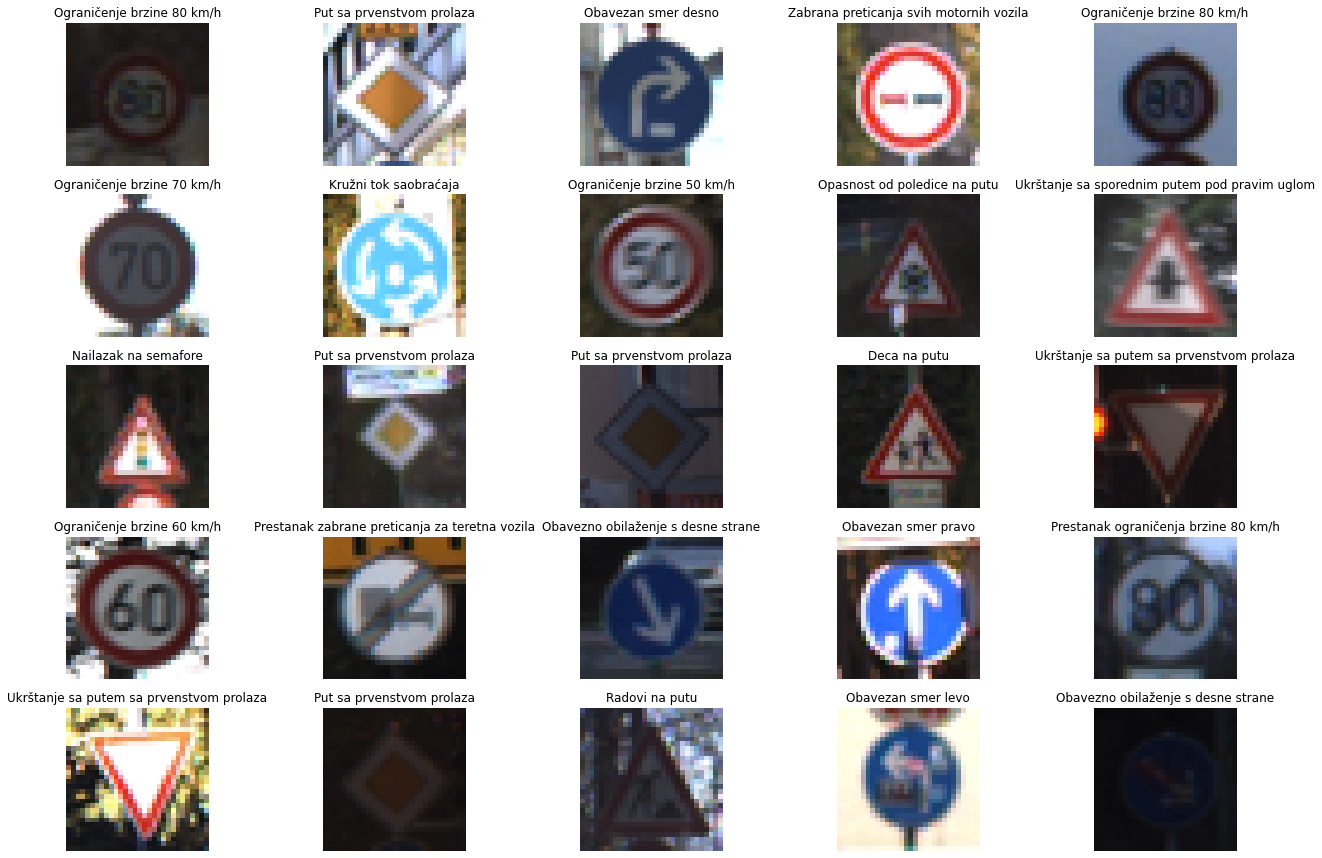

In [ ]:
m=slike_train.shape[0]

np.random.seed(2)

indeksi=list(np.random.permutation(m))

Slike_permutovane=slike_train[indeksi,:,:,:]
Labele_permutovane=labele_train[:,indeksi]
rows=5
cols=5



f, axarr = plt.subplots(5,5)
#plt.rcParams["figure.figsize"] = (10,10)

plt.subplots_adjust(right=3,top=3)

k=0

for i in range(5):
  for j in range(5):
    axarr[i,j].imshow(Slike_permutovane[k])
    axarr[i,j].axis('off')
    labela=int(Labele_permutovane[:,k])
    axarr[i,j].set_title(klase[labela])
    
    k=k+1

plt.show()

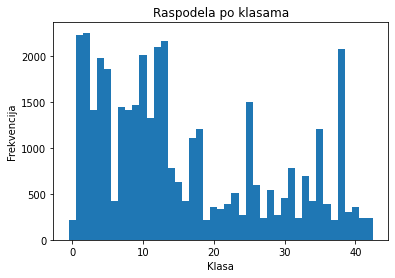

In [ ]:
unique,counts=np.unique(labele_train,return_counts=True)
plt.bar(unique, counts, 1)
plt.title('Raspodela po klasama')
plt.xlabel('Klasa')
plt.ylabel('Frekvencija')
plt.show()

In [ ]:
def vrati_tezine(counts):
  L=len(counts)

  maksimalna_vrednost=counts.max()

  tezine={
    
  }
  for i in range(L):
    tezine[i]=maksimalna_vrednost/counts[i]

  
  return tezine

In [ ]:
tezine=vrati_tezine(counts)

In [ ]:
tezine

{0: 10.714285714285714,
 1: 1.0135135135135136,
 2: 1.0,
 3: 1.5957446808510638,
 4: 1.1363636363636365,
 5: 1.2096774193548387,
 6: 5.357142857142857,
 7: 1.5625,
 8: 1.5957446808510638,
 9: 1.530612244897959,
 10: 1.1194029850746268,
 11: 1.7045454545454546,
 12: 1.0714285714285714,
 13: 1.0416666666666667,
 14: 2.8846153846153846,
 15: 3.5714285714285716,
 16: 5.357142857142857,
 17: 2.027027027027027,
 18: 1.875,
 19: 10.714285714285714,
 20: 6.25,
 21: 6.818181818181818,
 22: 5.769230769230769,
 23: 4.411764705882353,
 24: 8.333333333333334,
 25: 1.5,
 26: 3.75,
 27: 9.375,
 28: 4.166666666666667,
 29: 8.333333333333334,
 30: 5.0,
 31: 2.8846153846153846,
 32: 9.375,
 33: 3.265602322206096,
 34: 5.357142857142857,
 35: 1.875,
 36: 5.769230769230769,
 37: 10.714285714285714,
 38: 1.0869565217391304,
 39: 7.5,
 40: 6.25,
 41: 9.375,
 42: 9.375}

In [ ]:
slike_train_norm=slike_train/255
slike_test_norm=slike_test/255

In [ ]:
def one_hot_matrix(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
L=len(unique)

labele_train_one_hot=one_hot_matrix(labele_train,L).T
labele_test_one_hot=one_hot_matrix(labele_test,L).T

In [ ]:
print(labele_train_one_hot.shape)
print(labele_test_one_hot.shape)

(39209, 43)
(12630, 43)


In [ ]:
import tensorflow as tf
import random as rn 
import numpy as np
import keras
np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import MaxPooling2D, Conv2D
from keras.optimizers import Adam

def napravi_model_v1(input_shape,broj_klasa,activation="relu",learning_rate=0.001):

  model=Sequential()

  model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0),input_shape=input_shape))
  model.add(Activation(activation))
  model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(100,activation=activation))
  model.add(Dense(100,activation=activation))
  model.add(Dense(broj_klasa,activation="softmax"))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

  return model

"""np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model1=napravi_model_v1(slike_train_norm.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history1 = model1.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)"""

'np.random.seed(1)   \nrn.seed(2)     \ntf.compat.v1.set_random_seed(3)\n\nmodel1=napravi_model_v1(slike_train_norm.shape[1:],L)\n\nnp.random.seed(1)   \nrn.seed(2)   \ntf.compat.v1.set_random_seed(3)\n\nhistory1 = model1.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, \n                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)'

In [ ]:
labele_pred1=model1.predict(x=slike_test_norm)

In [ ]:
model1.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9719


[0.14258942008018494, 0.9718922972679138]

In [ ]:
train_losses1=history1.history["loss"]
test_losses1=history1.history["val_loss"]

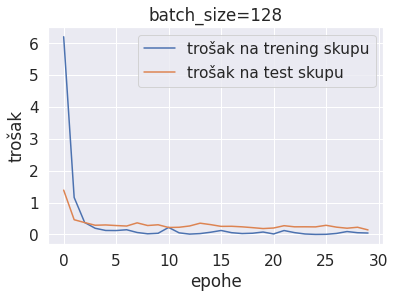

In [ ]:
plt.plot(train_losses1,label="trošak na trening skupu")
plt.plot(test_losses1,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("batch_size=128")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
labele_pred_conf1=np.argmax(labele_pred1, axis=1)

In [ ]:
labele_test_conf1=labele_test.reshape(labele_pred_conf1.shape[0],)

In [ ]:
conf1=confusion_matrix(labele_test_conf1,labele_pred_conf1)

In [ ]:
conf1

array([[ 59,   0,   0, ...,   0,   0,   0],
       [  0, 706,   4, ...,   0,   0,   0],
       [  0,   4, 744, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  88,   0,   0],
       [  0,   0,   0, ...,   0,  60,   0],
       [  0,   0,   0, ...,   4,   0,  67]])

In [ ]:
import seaborn as sn

"""df_cm = pd.DataFrame(conf1, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()"""

'df_cm = pd.DataFrame(conf1, range(L), range(L))\nplt.figure(figsize=(20,20))\nsn.set(font_scale=1.4) \nsn.heatmap(df_cm) \n\nplt.show()'

In [ ]:
from sklearn.metrics import classification_report

#izvestaj=classification_report(labele_test_conf1, labele_pred_conf1)

#print(izvestaj)

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model2=napravi_model_v1(slike_train_norm.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history2 = model2.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot))

Epoch 1/30
307/307 [==============================] - 9s 28ms/step - loss: 2.8151 - accuracy: 0.2154 - val_loss: 0.6152 - val_accuracy: 0.8060
Epoch 2/30
307/307 [==============================] - 8s 27ms/step - loss: 0.3362 - accuracy: 0.8929 - val_loss: 0.2738 - val_accuracy: 0.9287
Epoch 3/30
307/307 [==============================] - 8s 27ms/step - loss: 0.0835 - accuracy: 0.9745 - val_loss: 0.2508 - val_accuracy: 0.9410
Epoch 4/30
307/307 [==============================] - 8s 28ms/step - loss: 0.0512 - accuracy: 0.9836 - val_loss: 0.2104 - val_accuracy: 0.9491
Epoch 5/30
307/307 [==============================] - 9s 28ms/step - loss: 0.0296 - accuracy: 0.9916 - val_loss: 0.2379 - val_accuracy: 0.9439
Epoch 6/30
307/307 [==============================] - 8s 28ms/step - loss: 0.0458 - accuracy: 0.9863 - val_loss: 0.1721 - val_accuracy: 0.9575
Epoch 7/30
307/307 [==============================] - 8s 28ms/step - loss: 0.0223 - accuracy: 0.9934 - val_loss: 0.1488 - val_accuracy: 0.9620

In [ ]:
labele_pred2=model2.predict(x=slike_test_norm)

In [ ]:
model2.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.2041 - accuracy: 0.9773


[0.20414255559444427, 0.9772763252258301]

In [ ]:
train_losses2=history2.history["loss"]
test_losses2=history2.history["val_loss"]

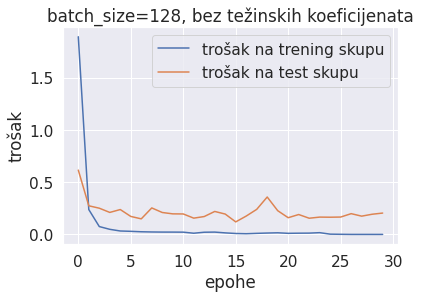

In [ ]:
plt.plot(train_losses2,label="trošak na trening skupu")
plt.plot(test_losses2,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.title("batch_size=128, bez težinskih koeficijenata")
plt.legend(loc="upper right")
plt.show()

In [ ]:
labele_pred_conf2=np.argmax(labele_pred2, axis=1)

labele_test_conf2=labele_test.reshape(labele_pred_conf2.shape[0],)

conf2=confusion_matrix(labele_test_conf2,labele_pred_conf2)

conf2

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 719,   0, ...,   0,   0,   0],
       [  0,   1, 749, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  89,   0,   0],
       [  0,   0,   0, ...,   0,  50,   0],
       [  0,   0,   0, ...,   0,   0,  89]])

In [ ]:
izvestaj2=classification_report(labele_test_conf2, labele_pred_conf2)

print(izvestaj2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      1.00       720
           2       0.97      1.00      0.98       750
           3       0.95      0.96      0.96       450
           4       1.00      0.99      0.99       660
           5       0.97      0.99      0.98       630
           6       0.97      0.75      0.85       150
           7       0.98      0.99      0.99       450
           8       0.99      0.94      0.97       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.97      0.99      0.98       420
          12       0.99      0.96      0.97       690
          13       0.98      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       0.98      0.99      0.99       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model3=napravi_model_v1(slike_train_norm.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history3 = model3.fit(slike_train_norm, labele_train_one_hot, batch_size=256,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 8s 51ms/step - loss: 8.4305 - accuracy: 0.0721 - val_loss: 1.7784 - val_accuracy: 0.4553
Epoch 2/30
154/154 [==============================] - 8s 50ms/step - loss: 2.8508 - accuracy: 0.6083 - val_loss: 0.5921 - val_accuracy: 0.8348
Epoch 3/30
154/154 [==============================] - 8s 51ms/step - loss: 0.6192 - accuracy: 0.9052 - val_loss: 0.4350 - val_accuracy: 0.9026
Epoch 4/30
154/154 [==============================] - 8s 51ms/step - loss: 0.1829 - accuracy: 0.9696 - val_loss: 0.4808 - val_accuracy: 0.8946
Epoch 5/30
154/154 [==============================] - 8s 51ms/step - loss: 0.1839 - accuracy: 0.9703 - val_loss: 0.3308 - val_accuracy: 0.9257
Epoch 6/30
154/154 [==============================] - 8s 51ms/step - loss: 0.0784 - accuracy: 0.9866 - val_loss: 0.5255 - val_accuracy: 0.8822
Epoch 7/30
154/154 [==============================] - 8s 50ms/step - loss: 0.1455 - accuracy: 0.9778 - val_loss: 0.2941 - val_accuracy: 0.9383

In [ ]:
labele_pred3=model3.predict(x=slike_test_norm)

In [ ]:
model3.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.2701 - accuracy: 0.9656


[0.270109623670578, 0.9655581712722778]

In [ ]:
train_losses3=history3.history["loss"]
test_losses3=history3.history["val_loss"]

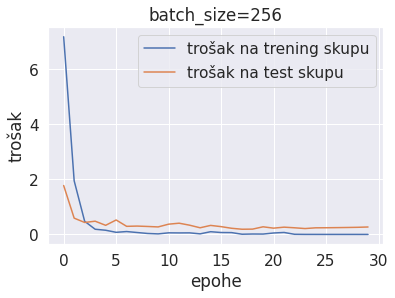

In [ ]:
plt.plot(train_losses3,label="trošak na trening skupu")
plt.plot(test_losses3,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("batch_size=256")
plt.show()

In [ ]:
labele_pred_conf3=np.argmax(labele_pred3, axis=1)

labele_test_conf3=labele_test.reshape(labele_pred_conf3.shape[0],)

conf3=confusion_matrix(labele_test_conf3,labele_pred_conf3)

conf3

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 714,   0, ...,   0,   0,   0],
       [  0,   9, 739, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  77,   0,   0],
       [  0,   0,   0, ...,   0,  58,   0],
       [  0,   0,   0, ...,   0,   0,  90]])

In [ ]:
izvestaj3=classification_report(labele_test_conf3, labele_pred_conf3)

print(izvestaj3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      0.99      0.99       720
           2       0.96      0.99      0.97       750
           3       0.98      0.94      0.96       450
           4       0.97      0.99      0.98       660
           5       0.94      0.96      0.95       630
           6       0.99      0.88      0.93       150
           7       0.99      0.98      0.99       450
           8       0.97      0.98      0.97       450
           9       0.99      1.00      1.00       480
          10       1.00      0.98      0.99       660
          11       0.98      0.97      0.98       420
          12       0.99      0.93      0.96       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model4=napravi_model_v1(slike_train_norm.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history4 = model4.fit(slike_train_norm, labele_train_one_hot, batch_size=64,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 11s 17ms/step - loss: 8.6456 - accuracy: 0.0531 - val_loss: 1.5544 - val_accuracy: 0.4945
Epoch 2/30
613/613 [==============================] - 10s 17ms/step - loss: 1.9518 - accuracy: 0.6912 - val_loss: 0.4658 - val_accuracy: 0.8721
Epoch 3/30
613/613 [==============================] - 10s 17ms/step - loss: 0.4454 - accuracy: 0.9273 - val_loss: 0.4287 - val_accuracy: 0.8894
Epoch 4/30
613/613 [==============================] - 10s 16ms/step - loss: 0.2454 - accuracy: 0.9592 - val_loss: 0.3376 - val_accuracy: 0.9193
Epoch 5/30
613/613 [==============================] - 10s 16ms/step - loss: 0.2025 - accuracy: 0.9700 - val_loss: 0.3411 - val_accuracy: 0.9213
Epoch 6/30
613/613 [==============================] - 10s 16ms/step - loss: 0.1431 - accuracy: 0.9798 - val_loss: 0.3416 - val_accuracy: 0.9275
Epoch 7/30
613/613 [==============================] - 10s 16ms/step - loss: 0.1618 - accuracy: 0.9764 - val_loss: 0.3265 - val_accuracy:

In [ ]:
labele_pred4=model4.predict(x=slike_test_norm)

In [ ]:
model4.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.3422 - accuracy: 0.9392


[0.34215641021728516, 0.9391924142837524]

In [ ]:
train_losses4=history4.history["loss"]
test_losses4=history4.history["val_loss"]

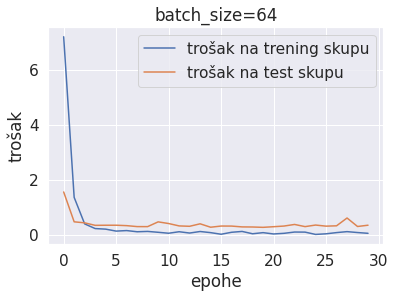

In [ ]:
plt.plot(train_losses4,label="trošak na trening skupu")
plt.plot(test_losses4,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.title("batch_size=64")
plt.legend(loc="upper right")
plt.show()

In [ ]:
labele_pred_conf4=np.argmax(labele_pred4, axis=1)

labele_test_conf4=labele_test.reshape(labele_pred_conf4.shape[0],)

conf4=confusion_matrix(labele_test_conf4,labele_pred_conf4)

conf4

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 719,   1, ...,   0,   0,   0],
       [  0,   5, 737, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  85,   0,   0],
       [  0,   0,   0, ...,   0,  52,   0],
       [  0,   0,   0, ...,   0,   2,  87]])

In [ ]:
izvestaj4=classification_report(labele_test_conf4, labele_pred_conf4)

print(izvestaj4)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        60
           1       0.97      1.00      0.98       720
           2       0.96      0.98      0.97       750
           3       0.99      0.92      0.95       450
           4       1.00      0.96      0.98       660
           5       0.87      0.97      0.92       630
           6       0.95      0.74      0.83       150
           7       0.95      0.95      0.95       450
           8       0.96      0.91      0.93       450
           9       0.98      1.00      0.99       480
          10       0.99      1.00      0.99       660
          11       0.92      0.86      0.89       420
          12       0.98      0.94      0.96       690
          13       0.99      0.99      0.99       720
          14       0.94      0.99      0.97       270
          15       0.95      0.99      0.97       210
          16       0.91      1.00      0.96       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model5=napravi_model_v1(slike_train_norm.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history5 = model5.fit(slike_train_norm, labele_train_one_hot, batch_size=32,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 14s 11ms/step - loss: 9.2817 - accuracy: 0.0196 - val_loss: 3.7612 - val_accuracy: 0.0594
Epoch 2/30
1226/1226 [==============================] - 13s 10ms/step - loss: 9.2787 - accuracy: 0.0142 - val_loss: 3.7609 - val_accuracy: 0.0523
Epoch 3/30
1226/1226 [==============================] - 13s 10ms/step - loss: 9.2715 - accuracy: 0.0239 - val_loss: 3.7613 - val_accuracy: 0.0071
Epoch 4/30
1226/1226 [==============================] - 13s 10ms/step - loss: 9.2505 - accuracy: 0.0240 - val_loss: 3.7612 - val_accuracy: 0.0594
Epoch 5/30
1226/1226 [==============================] - 13s 10ms/step - loss: 9.3177 - accuracy: 0.0226 - val_loss: 3.7600 - val_accuracy: 0.0594
Epoch 6/30
1226/1226 [==============================] - 13s 10ms/step - loss: 9.3335 - accuracy: 0.0165 - val_loss: 3.7592 - val_accuracy: 0.0546
Epoch 7/30
1226/1226 [==============================] - 13s 10ms/step - loss: 9.2856 - accuracy: 0.0227 - val_loss: 3.7612 -

In [ ]:
labele_pred5=model5.predict(x=slike_test_norm)

In [ ]:
model5.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 3.7630 - accuracy: 0.0356


[3.7630205154418945, 0.035629455000162125]

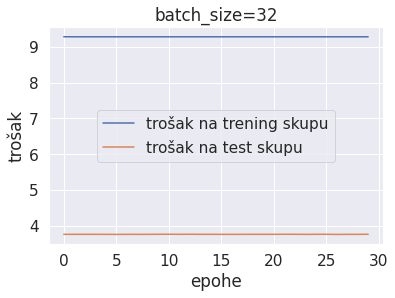

In [ ]:
train_losses5=history5.history["loss"]
test_losses5=history5.history["val_loss"]

plt.plot(train_losses5,label="trošak na trening skupu")
plt.plot(test_losses5,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="center")
plt.title("batch_size=32")
plt.show()

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model6=napravi_model_v1(slike_train_norm.shape[1:],L,activation="sigmoid")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history6 = model6.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 10s 32ms/step - loss: 9.3395 - accuracy: 0.0147 - val_loss: 3.7793 - val_accuracy: 0.0119
Epoch 2/30
307/307 [==============================] - 9s 31ms/step - loss: 9.2996 - accuracy: 0.0124 - val_loss: 3.7585 - val_accuracy: 0.0071
Epoch 3/30
307/307 [==============================] - 9s 31ms/step - loss: 9.2853 - accuracy: 0.0100 - val_loss: 3.7613 - val_accuracy: 0.0071
Epoch 4/30
307/307 [==============================] - 9s 31ms/step - loss: 9.2627 - accuracy: 0.0167 - val_loss: 3.7559 - val_accuracy: 0.0048
Epoch 5/30
307/307 [==============================] - 9s 31ms/step - loss: 9.3290 - accuracy: 0.0131 - val_loss: 3.7550 - val_accuracy: 0.0095
Epoch 6/30
307/307 [==============================] - 9s 31ms/step - loss: 9.3406 - accuracy: 0.0100 - val_loss: 3.7562 - val_accuracy: 0.0071
Epoch 7/30
307/307 [==============================] - 9s 31ms/step - loss: 9.2889 - accuracy: 0.0116 - val_loss: 3.7632 - val_accuracy: 0.007

In [ ]:
labele_pred6=model6.predict(x=slike_test_norm)

In [ ]:
model6.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 5ms/step - loss: 3.7617 - accuracy: 0.0285


[3.7617347240448, 0.02850356325507164]

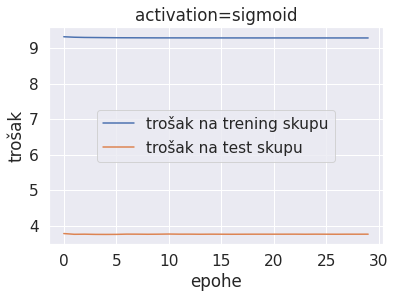

In [ ]:
train_losses6=history6.history["loss"]
test_losses6=history6.history["val_loss"]

plt.plot(train_losses6,label="trošak na trening skupu")
plt.plot(test_losses6,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="center")
plt.title("activation=sigmoid")
plt.show()

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model7=napravi_model_v1(slike_train_norm.shape[1:],L,activation="tanh")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history7 = model7.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 10s 32ms/step - loss: 5.5737 - accuracy: 0.3945 - val_loss: 0.3814 - val_accuracy: 0.9048
Epoch 2/30
307/307 [==============================] - 9s 31ms/step - loss: 0.2763 - accuracy: 0.9743 - val_loss: 0.2500 - val_accuracy: 0.9317
Epoch 3/30
307/307 [==============================] - 9s 31ms/step - loss: 0.0849 - accuracy: 0.9928 - val_loss: 0.2065 - val_accuracy: 0.9439
Epoch 4/30
307/307 [==============================] - 9s 31ms/step - loss: 0.0699 - accuracy: 0.9933 - val_loss: 0.2040 - val_accuracy: 0.9440
Epoch 5/30
307/307 [==============================] - 10s 31ms/step - loss: 0.0942 - accuracy: 0.9864 - val_loss: 0.3354 - val_accuracy: 0.9042
Epoch 6/30
307/307 [==============================] - 9s 31ms/step - loss: 0.1875 - accuracy: 0.9765 - val_loss: 0.2347 - val_accuracy: 0.9352
Epoch 7/30
307/307 [==============================] - 9s 31ms/step - loss: 0.1780 - accuracy: 0.9764 - val_loss: 0.2209 - val_accuracy: 0.93

In [ ]:
labele_pred7=model7.predict(x=slike_test_norm)

In [ ]:
model7.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 5ms/step - loss: 0.1225 - accuracy: 0.9677


[0.1225162148475647, 0.967695951461792]

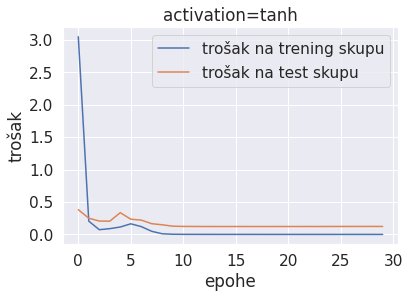

In [ ]:
train_losses7=history7.history["loss"]
test_losses7=history7.history["val_loss"]

plt.plot(train_losses7,label="trošak na trening skupu")
plt.plot(test_losses7,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=tanh")
plt.show()

In [ ]:

labele_pred_conf7=np.argmax(labele_pred7, axis=1)

labele_test_conf7=labele_test.reshape(labele_pred_conf7.shape[0],)

conf7=confusion_matrix(labele_test_conf7,labele_pred_conf7)

conf7

array([[ 57,   3,   0, ...,   0,   0,   0],
       [  0, 708,   0, ...,   0,   0,   0],
       [  0,   3, 745, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  81,   0,   0],
       [  0,   0,   0, ...,   0,  52,   0],
       [  0,   0,   0, ...,   0,   1,  89]])

In [ ]:
izvestaj7=classification_report(labele_test_conf7, labele_pred_conf7)

print(izvestaj7)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.96      0.98      0.97       720
           2       0.99      0.99      0.99       750
           3       0.97      0.96      0.97       450
           4       0.98      0.98      0.98       660
           5       0.91      0.97      0.94       630
           6       1.00      0.81      0.89       150
           7       0.97      0.92      0.95       450
           8       0.97      0.96      0.97       450
           9       0.98      1.00      0.99       480
          10       0.99      1.00      0.99       660
          11       0.89      0.99      0.94       420
          12       0.98      0.99      0.98       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model8=napravi_model_v1(slike_train_norm.shape[1:],L,activation="tanh")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history8 = model8.fit(slike_train_norm, labele_train_one_hot, batch_size=32,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 14s 11ms/step - loss: 7.0851 - accuracy: 0.1866 - val_loss: 1.4716 - val_accuracy: 0.5250
Epoch 2/30
1226/1226 [==============================] - 14s 11ms/step - loss: 2.3378 - accuracy: 0.6784 - val_loss: 0.8501 - val_accuracy: 0.7378
Epoch 3/30
1226/1226 [==============================] - 14s 11ms/step - loss: 1.0486 - accuracy: 0.8400 - val_loss: 0.6902 - val_accuracy: 0.7956
Epoch 4/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.7504 - accuracy: 0.8886 - val_loss: 0.5000 - val_accuracy: 0.8599
Epoch 5/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.6505 - accuracy: 0.9034 - val_loss: 0.4904 - val_accuracy: 0.8625
Epoch 6/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.6658 - accuracy: 0.9015 - val_loss: 0.5240 - val_accuracy: 0.8510
Epoch 7/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.5721 - accuracy: 0.9094 - val_loss: 0.4575 -

In [ ]:

labele_pred8=model8.predict(x=slike_test_norm)

In [ ]:
model8.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 5ms/step - loss: 0.7097 - accuracy: 0.8080


[0.7096800804138184, 0.8079968094825745]

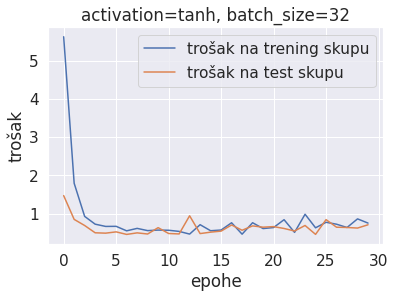

In [ ]:
train_losses8=history8.history["loss"]
test_losses8=history8.history["val_loss"]

plt.plot(train_losses8,label="trošak na trening skupu")
plt.plot(test_losses8,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=tanh, batch_size=32")
plt.show()

In [ ]:
labele_pred_conf8=np.argmax(labele_pred8, axis=1)

labele_test_conf8=labele_test.reshape(labele_pred_conf8.shape[0],)

conf8=confusion_matrix(labele_test_conf8,labele_pred_conf8)

conf8

array([[ 39,   5,   0, ...,   0,   0,   0],
       [ 27, 505,  36, ...,   5,   0,   0],
       [  0,  45, 545, ...,  18,   0,   0],
       ...,
       [  0,   0,   4, ...,  59,   0,   0],
       [  0,   0,   0, ...,   0,  48,   0],
       [  0,   0,   0, ...,   4,  19,  62]])

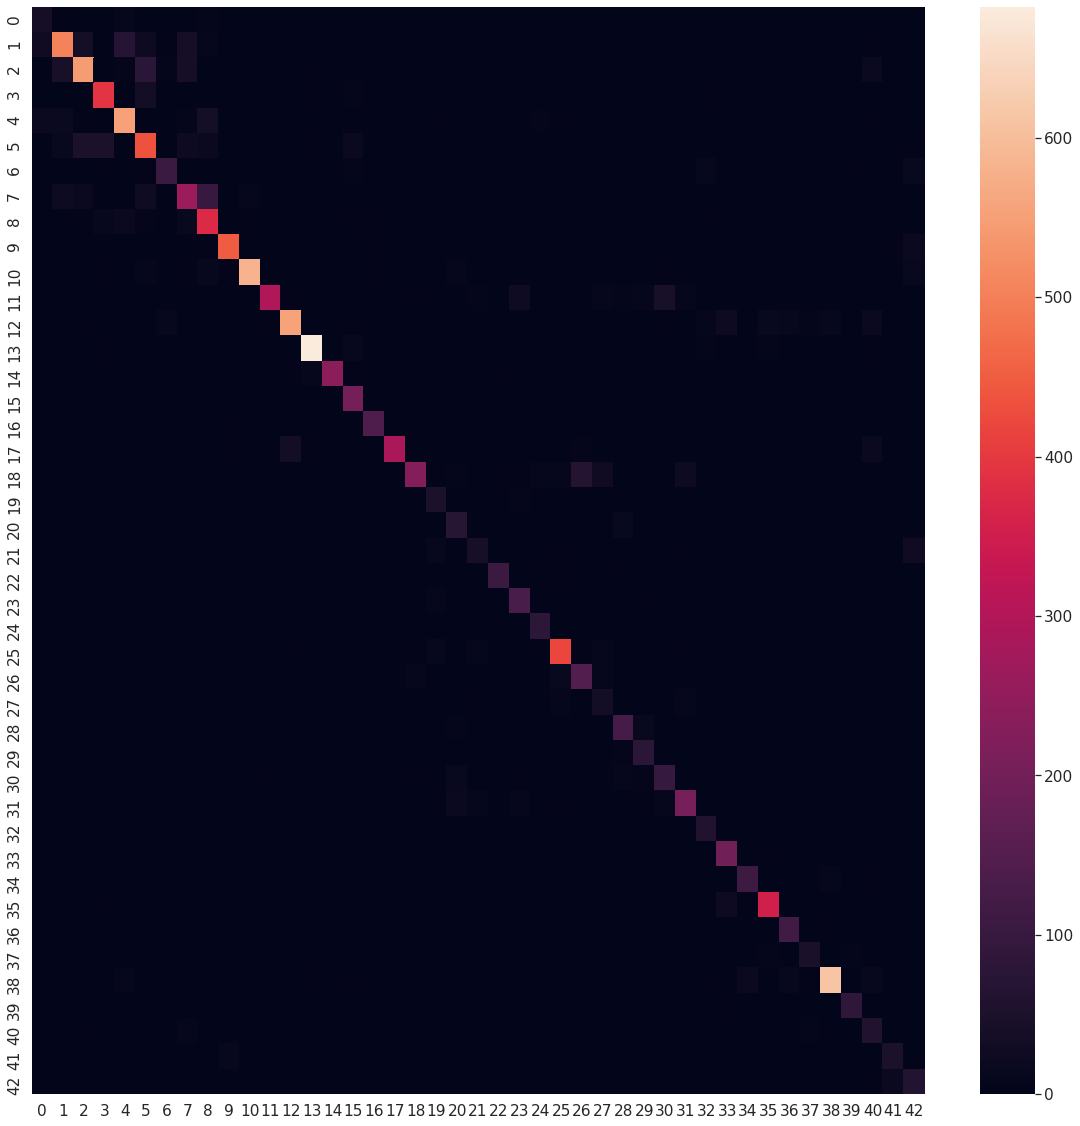

In [ ]:
df_cm = pd.DataFrame(conf8, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj8=classification_report(labele_test_conf8, labele_pred_conf8)

print(izvestaj8)

              precision    recall  f1-score   support

           0       0.44      0.65      0.52        60
           1       0.83      0.70      0.76       720
           2       0.82      0.73      0.77       750
           3       0.82      0.88      0.85       450
           4       0.83      0.84      0.83       660
           5       0.70      0.69      0.70       630
           6       0.80      0.69      0.74       150
           7       0.66      0.59      0.62       450
           8       0.67      0.83      0.74       450
           9       0.94      0.93      0.94       480
          10       0.96      0.88      0.92       660
          11       0.95      0.71      0.81       420
          12       0.92      0.80      0.86       690
          13       0.95      0.95      0.95       720
          14       0.99      0.89      0.94       270
          15       0.77      0.98      0.86       210
          16       0.87      0.93      0.90       150
          17       1.00    

In [ ]:

np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model9=napravi_model_v1(slike_train_norm.shape[1:],L,activation="tanh")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history9 = model9.fit(slike_train_norm, labele_train_one_hot, batch_size=64,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 12s 18ms/step - loss: 8.1542 - accuracy: 0.0993 - val_loss: 1.8697 - val_accuracy: 0.3692
Epoch 2/30
613/613 [==============================] - 11s 18ms/step - loss: 3.4656 - accuracy: 0.5262 - val_loss: 0.8085 - val_accuracy: 0.7360
Epoch 3/30
613/613 [==============================] - 11s 18ms/step - loss: 1.0138 - accuracy: 0.8386 - val_loss: 0.5180 - val_accuracy: 0.8349
Epoch 4/30
613/613 [==============================] - 11s 18ms/step - loss: 0.5082 - accuracy: 0.9183 - val_loss: 0.4004 - val_accuracy: 0.8762
Epoch 5/30
613/613 [==============================] - 11s 18ms/step - loss: 0.4179 - accuracy: 0.9335 - val_loss: 0.5634 - val_accuracy: 0.8340
Epoch 6/30
613/613 [==============================] - 11s 18ms/step - loss: 0.4653 - accuracy: 0.9275 - val_loss: 0.3788 - val_accuracy: 0.8889
Epoch 7/30
613/613 [==============================] - 11s 18ms/step - loss: 0.2878 - accuracy: 0.9489 - val_loss: 0.4028 - val_accuracy:

In [ ]:
labele_pred9=model9.predict(x=slike_test_norm)

In [ ]:
model9.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 5ms/step - loss: 0.4639 - accuracy: 0.8698


[0.4638984501361847, 0.8698337078094482]

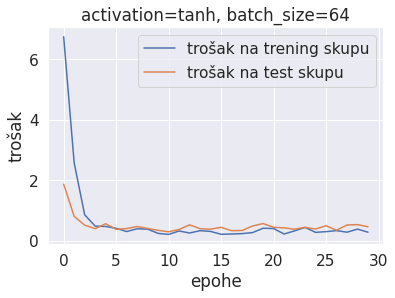

In [ ]:
train_losses9=history9.history["loss"]
test_losses9=history9.history["val_loss"]

plt.plot(train_losses9,label="trošak na trening skupu")
plt.plot(test_losses9,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=tanh, batch_size=64")
plt.show()

In [ ]:
labele_pred_conf9=np.argmax(labele_pred9, axis=1)

labele_test_conf9=labele_test.reshape(labele_pred_conf9.shape[0],)

conf9=confusion_matrix(labele_test_conf9,labele_pred_conf9)

conf9

array([[ 56,   3,   0, ...,   0,   0,   0],
       [ 30, 637,  15, ...,   0,   0,   0],
       [  1,  15, 708, ...,   0,   0,   0],
       ...,
       [  0,  11,   3, ...,  70,   0,   0],
       [  0,   0,   0, ...,   0,  53,   0],
       [  0,   0,   0, ...,   0,   8,  72]])

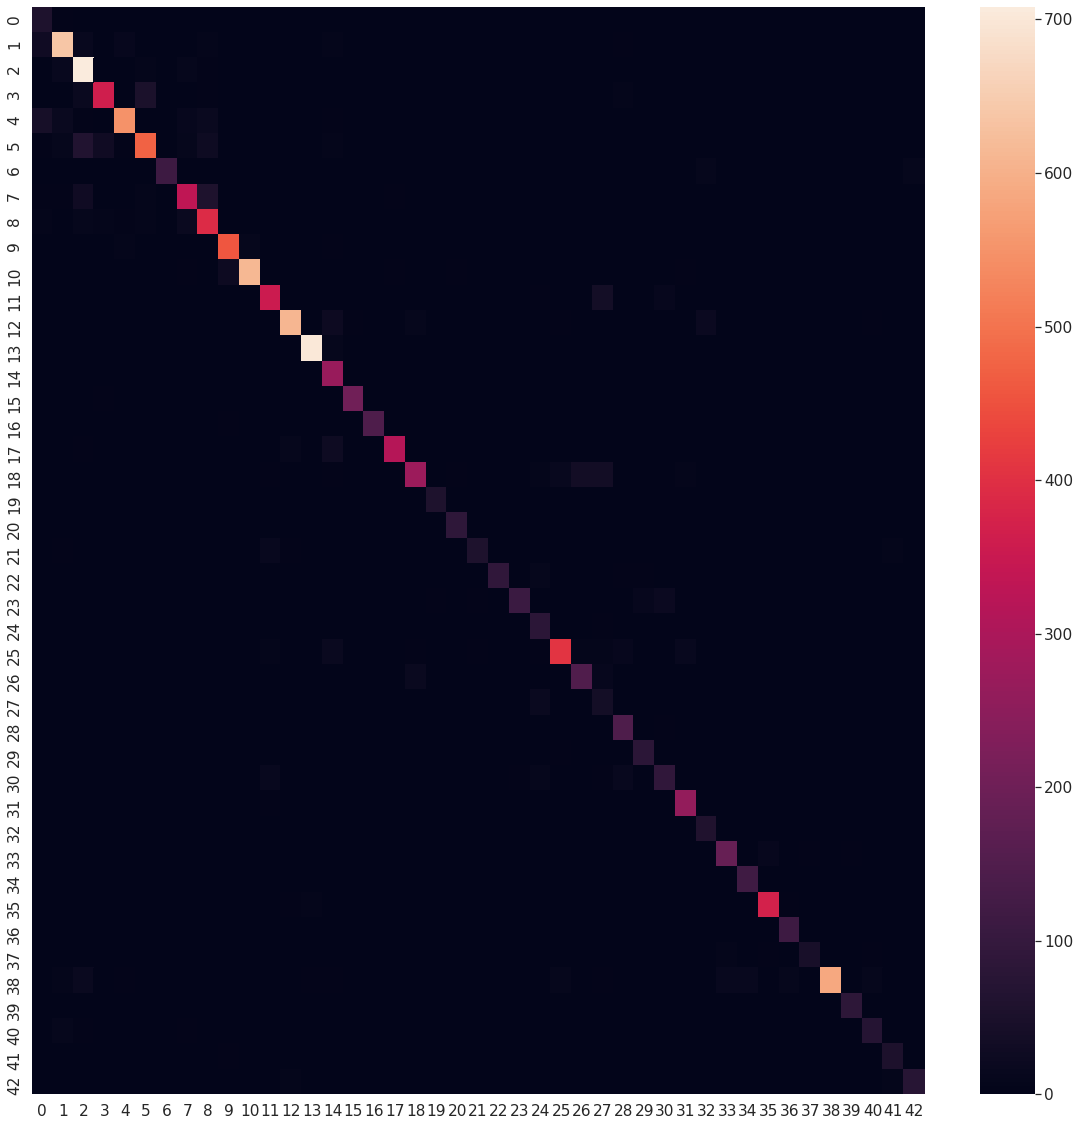

In [ ]:
df_cm = pd.DataFrame(conf9, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj9=classification_report(labele_test_conf9, labele_pred_conf9)

print(izvestaj9)

              precision    recall  f1-score   support

           0       0.37      0.93      0.53        60
           1       0.89      0.88      0.89       720
           2       0.81      0.94      0.87       750
           3       0.88      0.81      0.84       450
           4       0.93      0.83      0.88       660
           5       0.86      0.75      0.80       630
           6       0.97      0.77      0.86       150
           7       0.85      0.74      0.79       450
           8       0.77      0.87      0.81       450
           9       0.93      0.96      0.95       480
          10       0.97      0.93      0.95       660
          11       0.88      0.84      0.86       420
          12       0.95      0.88      0.92       690
          13       0.98      0.97      0.97       720
          14       0.70      1.00      0.83       270
          15       0.97      0.97      0.97       210
          16       0.97      0.97      0.97       150
          17       0.95    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model10=napravi_model_v1(slike_train_norm.shape[1:],L,activation="tanh")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history10 = model10.fit(slike_train_norm, labele_train_one_hot, batch_size=256,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 10s 57ms/step - loss: 6.5201 - accuracy: 0.2800 - val_loss: 0.6287 - val_accuracy: 0.8435
Epoch 2/30
154/154 [==============================] - 9s 56ms/step - loss: 0.5474 - accuracy: 0.9514 - val_loss: 0.2375 - val_accuracy: 0.9375
Epoch 3/30
154/154 [==============================] - 9s 56ms/step - loss: 0.0902 - accuracy: 0.9962 - val_loss: 0.1745 - val_accuracy: 0.9530
Epoch 4/30
154/154 [==============================] - 9s 57ms/step - loss: 0.0286 - accuracy: 0.9996 - val_loss: 0.1500 - val_accuracy: 0.9586
Epoch 5/30
154/154 [==============================] - 9s 57ms/step - loss: 0.0146 - accuracy: 0.9999 - val_loss: 0.1359 - val_accuracy: 0.9613
Epoch 6/30
154/154 [==============================] - 9s 58ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9620
Epoch 7/30
154/154 [==============================] - 9s 57ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.1290 - val_accuracy: 0.962

In [ ]:
labele_pred10=model10.predict(x=slike_test_norm)

In [ ]:
model10.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 5ms/step - loss: 0.1181 - accuracy: 0.9675


[0.11809616535902023, 0.9675375819206238]

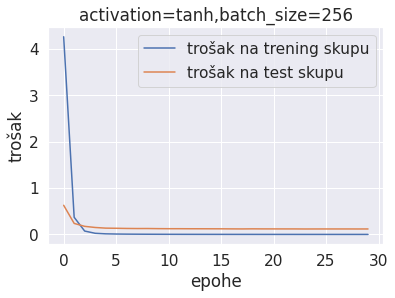

In [ ]:
train_losses10=history10.history["loss"]
test_losses10=history10.history["val_loss"]

plt.plot(train_losses10,label="trošak na trening skupu")
plt.plot(test_losses10,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=tanh,batch_size=256")
plt.show()

In [ ]:
labele_pred_conf10=np.argmax(labele_pred10, axis=1)

labele_test_conf10=labele_test.reshape(labele_pred_conf10.shape[0],)

conf10=confusion_matrix(labele_test_conf10,labele_pred_conf10)

conf10

array([[ 52,   8,   0, ...,   0,   0,   0],
       [  0, 712,   0, ...,   0,   0,   0],
       [  0,   2, 747, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  88,   0,   0],
       [  0,   0,   0, ...,   0,  49,   0],
       [  0,   0,   0, ...,   0,   1,  89]])

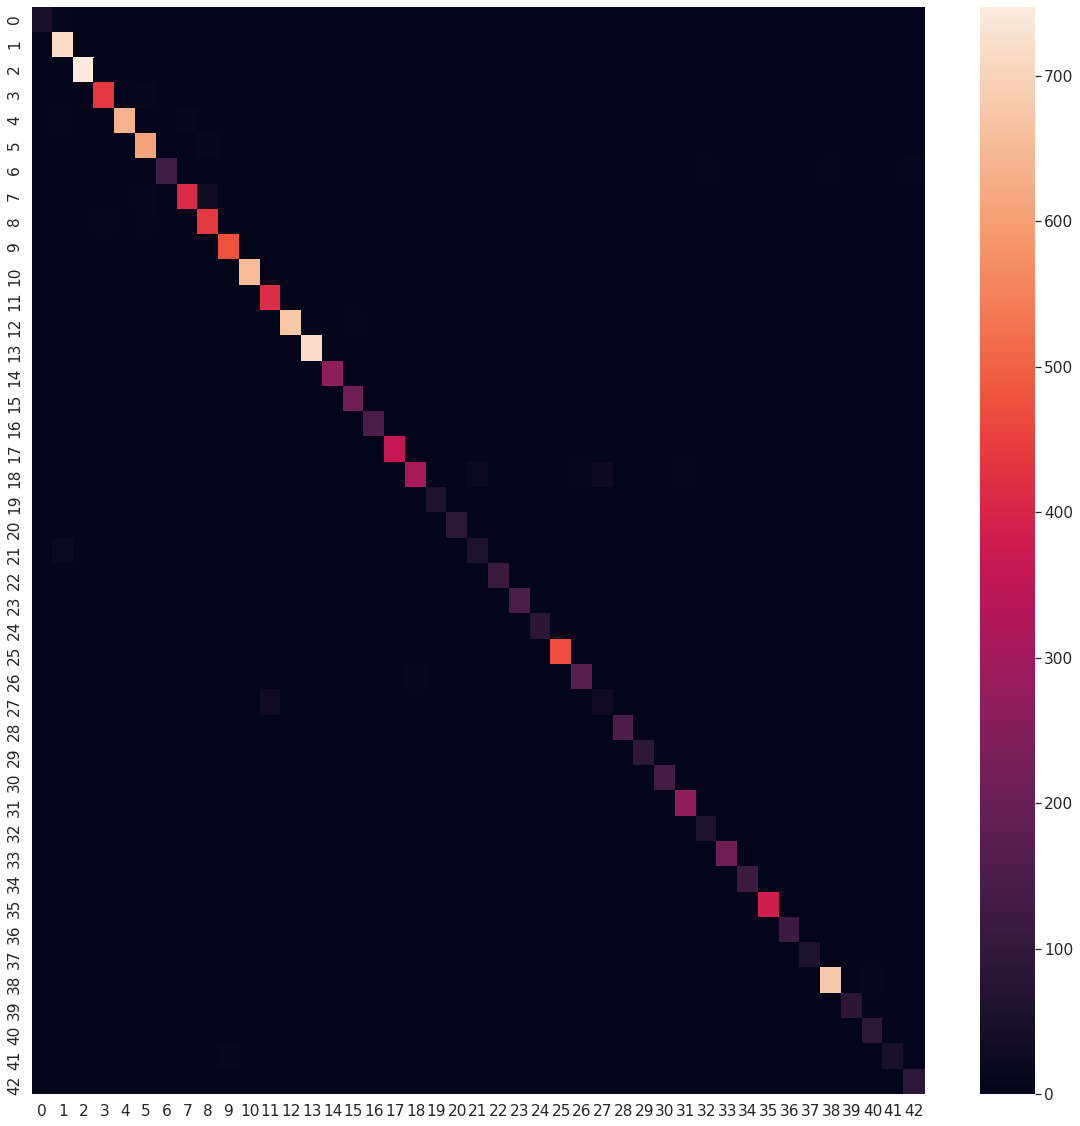

In [ ]:
df_cm = pd.DataFrame(conf10, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:

izvestaj10=classification_report(labele_test_conf10, labele_pred_conf10)

print(izvestaj10)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        60
           1       0.95      0.99      0.97       720
           2       0.99      1.00      0.99       750
           3       0.98      0.97      0.98       450
           4       0.99      0.97      0.98       660
           5       0.95      0.97      0.96       630
           6       1.00      0.82      0.90       150
           7       0.97      0.91      0.94       450
           8       0.91      0.97      0.94       450
           9       0.97      1.00      0.98       480
          10       0.99      0.99      0.99       660
          11       0.91      0.99      0.95       420
          12       0.99      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model11=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.01)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history11 = model11.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 9s 27ms/step - loss: 105.3432 - accuracy: 0.0174 - val_loss: 3.7717 - val_accuracy: 0.0119
Epoch 2/30
307/307 [==============================] - 8s 26ms/step - loss: 9.2833 - accuracy: 0.0167 - val_loss: 3.7622 - val_accuracy: 0.0166
Epoch 3/30
307/307 [==============================] - 8s 26ms/step - loss: 9.2740 - accuracy: 0.0175 - val_loss: 3.7615 - val_accuracy: 0.0071
Epoch 4/30
307/307 [==============================] - 8s 26ms/step - loss: 9.2553 - accuracy: 0.0234 - val_loss: 3.7581 - val_accuracy: 0.0071
Epoch 5/30
307/307 [==============================] - 8s 26ms/step - loss: 9.3250 - accuracy: 0.0208 - val_loss: 3.7562 - val_accuracy: 0.0546
Epoch 6/30
307/307 [==============================] - 8s 26ms/step - loss: 9.3393 - accuracy: 0.0136 - val_loss: 3.7540 - val_accuracy: 0.0356
Epoch 7/30
307/307 [==============================] - 8s 26ms/step - loss: 9.2889 - accuracy: 0.0222 - val_loss: 3.7644 - val_accuracy: 0.00

In [ ]:
labele_pred11=model11.predict(x=slike_test_norm)

In [ ]:
model11.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 3.7696 - accuracy: 0.0214


[3.7695813179016113, 0.021377671509981155]

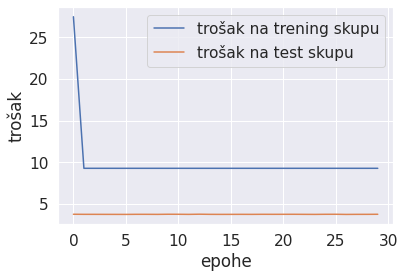

In [ ]:
train_losses11=history11.history["loss"]
test_losses11=history11.history["val_loss"]

plt.plot(train_losses11,label="trošak na trening skupu")
plt.plot(test_losses11,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.show()

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model12=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.1)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history12 = model12.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 9s 27ms/step - loss: 9785444942.5752 - accuracy: 0.0174 - val_loss: 3.7801 - val_accuracy: 0.0119
Epoch 2/30
307/307 [==============================] - 8s 26ms/step - loss: 9.3085 - accuracy: 0.0140 - val_loss: 3.7645 - val_accuracy: 0.0356
Epoch 3/30
307/307 [==============================] - 8s 26ms/step - loss: 9.3053 - accuracy: 0.0129 - val_loss: 3.7977 - val_accuracy: 0.0166
Epoch 4/30
307/307 [==============================] - 8s 26ms/step - loss: 9.2876 - accuracy: 0.0119 - val_loss: 3.7397 - val_accuracy: 0.0071
Epoch 5/30
307/307 [==============================] - 8s 26ms/step - loss: 9.3586 - accuracy: 0.0149 - val_loss: 3.7604 - val_accuracy: 0.0119
Epoch 6/30
307/307 [==============================] - 8s 26ms/step - loss: 9.3753 - accuracy: 0.0112 - val_loss: 3.7788 - val_accuracy: 0.0356
Epoch 7/30
307/307 [==============================] - 8s 26ms/step - loss: 9.3214 - accuracy: 0.0173 - val_loss: 3.7549 - val_accurac

In [ ]:
labele_pred12=model12.predict(x=slike_test_norm)

In [ ]:
model12.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 3.8024 - accuracy: 0.0214


[3.8024208545684814, 0.021377671509981155]

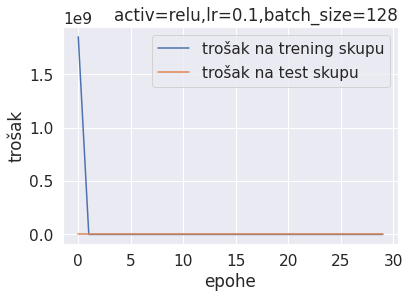

In [ ]:
train_losses12=history12.history["loss"]
test_losses12=history12.history["val_loss"]


plt.plot(train_losses12,label="trošak na trening skupu")
plt.plot(test_losses12,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activ=relu,lr=0.1,batch_size=128",loc="right")
plt.show()

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model13=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.0001)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history13 = model13.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 10s 29ms/step - loss: 8.5543 - accuracy: 0.0626 - val_loss: 2.2773 - val_accuracy: 0.3473
Epoch 2/30
307/307 [==============================] - 9s 29ms/step - loss: 4.1653 - accuracy: 0.4817 - val_loss: 1.4959 - val_accuracy: 0.5907
Epoch 3/30
307/307 [==============================] - 9s 29ms/step - loss: 1.5952 - accuracy: 0.7589 - val_loss: 1.0758 - val_accuracy: 0.7188
Epoch 4/30
307/307 [==============================] - 9s 29ms/step - loss: 0.7458 - accuracy: 0.8807 - val_loss: 0.9128 - val_accuracy: 0.7731
Epoch 5/30
307/307 [==============================] - 9s 29ms/step - loss: 0.4438 - accuracy: 0.9204 - val_loss: 0.7754 - val_accuracy: 0.8010
Epoch 6/30
307/307 [==============================] - 9s 29ms/step - loss: 0.2979 - accuracy: 0.9475 - val_loss: 0.8232 - val_accuracy: 0.8241
Epoch 7/30
307/307 [==============================] - 9s 29ms/step - loss: 0.1951 - accuracy: 0.9637 - val_loss: 0.7942 - val_accuracy: 0.843

In [ ]:
labele_pred13=model3.predict(x=slike_test_norm)

In [ ]:
model13.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.8288 - accuracy: 0.9076


[0.8288232088088989, 0.9076009392738342]

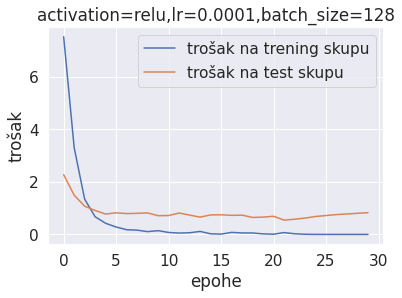

In [ ]:
train_losses13=history13.history["loss"]
test_losses13=history13.history["val_loss"]

plt.plot(train_losses13,label="trošak na trening skupu")
plt.plot(test_losses13,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=relu,lr=0.0001,batch_size=128")
plt.show()

In [ ]:
labele_pred_conf13=np.argmax(labele_pred13, axis=1)

labele_test_conf13=labele_test.reshape(labele_pred_conf13.shape[0],)

conf13=confusion_matrix(labele_test_conf13,labele_pred_conf13)

conf13

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  0, 714,   0, ...,   0,   0,   0],
       [  0,   9, 739, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  77,   0,   0],
       [  0,   0,   0, ...,   0,  58,   0],
       [  0,   0,   0, ...,   0,   0,  90]])

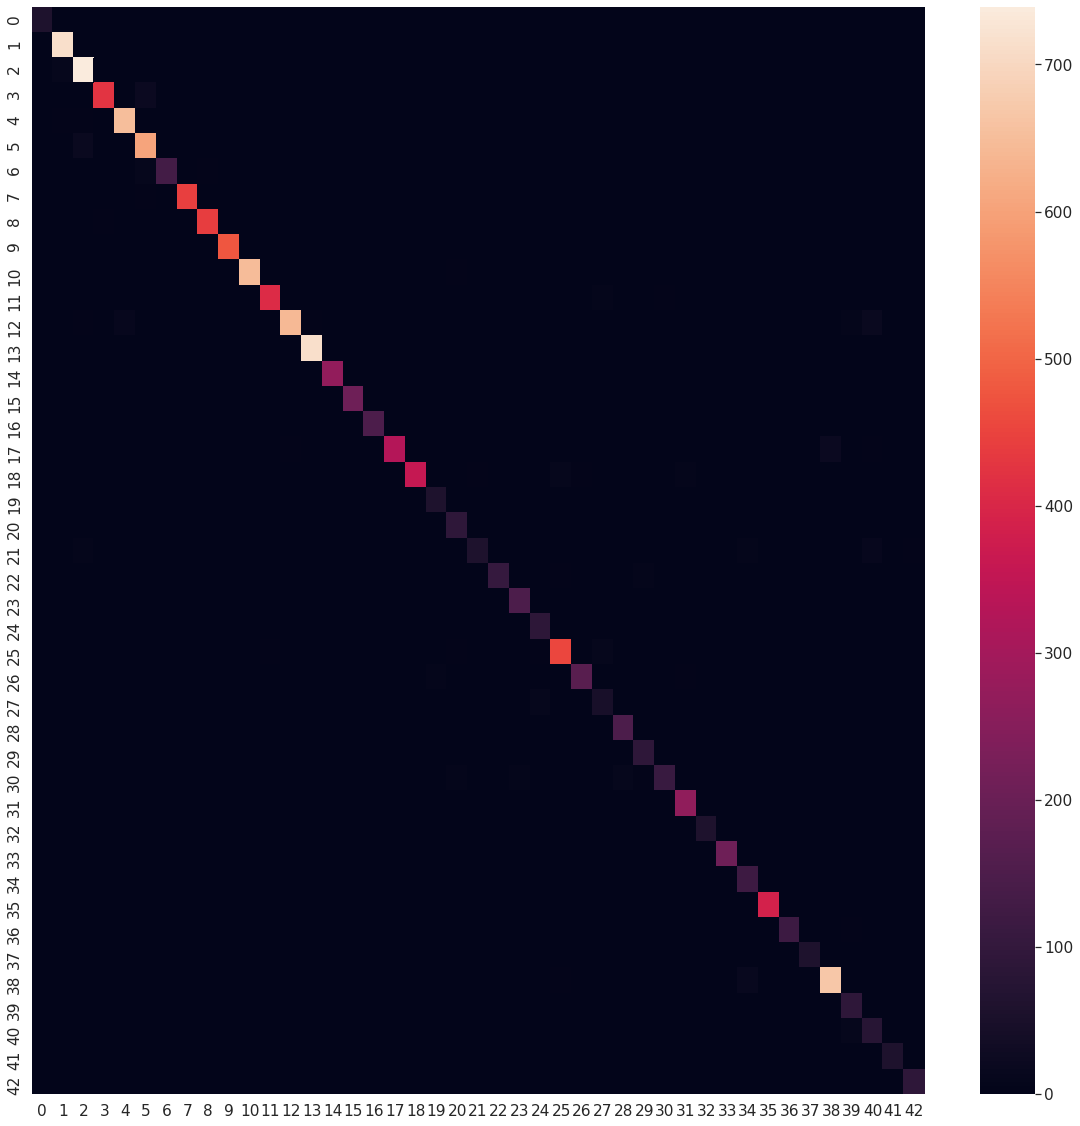

In [ ]:
df_cm = pd.DataFrame(conf13, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj13=classification_report(labele_test_conf13, labele_pred_conf13)

print(izvestaj13)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      0.99      0.99       720
           2       0.96      0.99      0.97       750
           3       0.98      0.94      0.96       450
           4       0.97      0.99      0.98       660
           5       0.94      0.96      0.95       630
           6       0.99      0.88      0.93       150
           7       0.99      0.98      0.99       450
           8       0.97      0.98      0.97       450
           9       0.99      1.00      1.00       480
          10       1.00      0.98      0.99       660
          11       0.98      0.97      0.98       420
          12       0.99      0.93      0.96       690
          13       0.99      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      0.99       210
          16       1.00      1.00      1.00       150
          17       1.00    

In [ ]:

np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model14=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.0001)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history14 = model14.fit(slike_train_norm, labele_train_one_hot, batch_size=64,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 11s 17ms/step - loss: 8.2186 - accuracy: 0.0954 - val_loss: 1.7413 - val_accuracy: 0.4873
Epoch 2/30
613/613 [==============================] - 10s 17ms/step - loss: 2.7299 - accuracy: 0.6154 - val_loss: 0.9825 - val_accuracy: 0.7303
Epoch 3/30
613/613 [==============================] - 11s 17ms/step - loss: 0.8220 - accuracy: 0.8610 - val_loss: 0.7003 - val_accuracy: 0.8150
Epoch 4/30
613/613 [==============================] - 10s 17ms/step - loss: 0.3676 - accuracy: 0.9345 - val_loss: 0.5964 - val_accuracy: 0.8517
Epoch 5/30
613/613 [==============================] - 10s 17ms/step - loss: 0.2435 - accuracy: 0.9586 - val_loss: 0.6855 - val_accuracy: 0.8554
Epoch 6/30
613/613 [==============================] - 10s 17ms/step - loss: 0.2233 - accuracy: 0.9631 - val_loss: 0.6552 - val_accuracy: 0.8726
Epoch 7/30
613/613 [==============================] - 10s 17ms/step - loss: 0.1319 - accuracy: 0.9793 - val_loss: 0.7463 - val_accuracy:

In [ ]:
labele_pred14=model14.predict(x=slike_test_norm)

In [ ]:
model14.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.6957 - accuracy: 0.9358


[0.6956576108932495, 0.9357877969741821]

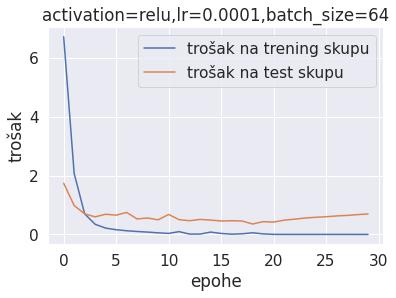

In [ ]:
train_losses14=history14.history["loss"]
test_losses14=history14.history["val_loss"]

plt.plot(train_losses14,label="trošak na trening skupu")
plt.plot(test_losses14,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=relu,lr=0.0001,batch_size=64")
plt.show()

In [ ]:
labele_pred_conf14=np.argmax(labele_pred14, axis=1)

labele_test_conf14=labele_test.reshape(labele_pred_conf14.shape[0],)

conf14=confusion_matrix(labele_test_conf14,labele_pred_conf14)

conf14

array([[ 54,   1,   0, ...,   0,   0,   0],
       [  0, 694,   5, ...,   0,   0,   0],
       [  0,  14, 722, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  87,   0,   0],
       [  0,   0,   0, ...,   0,  54,   2],
       [  0,   0,   0, ...,   0,   0,  90]])

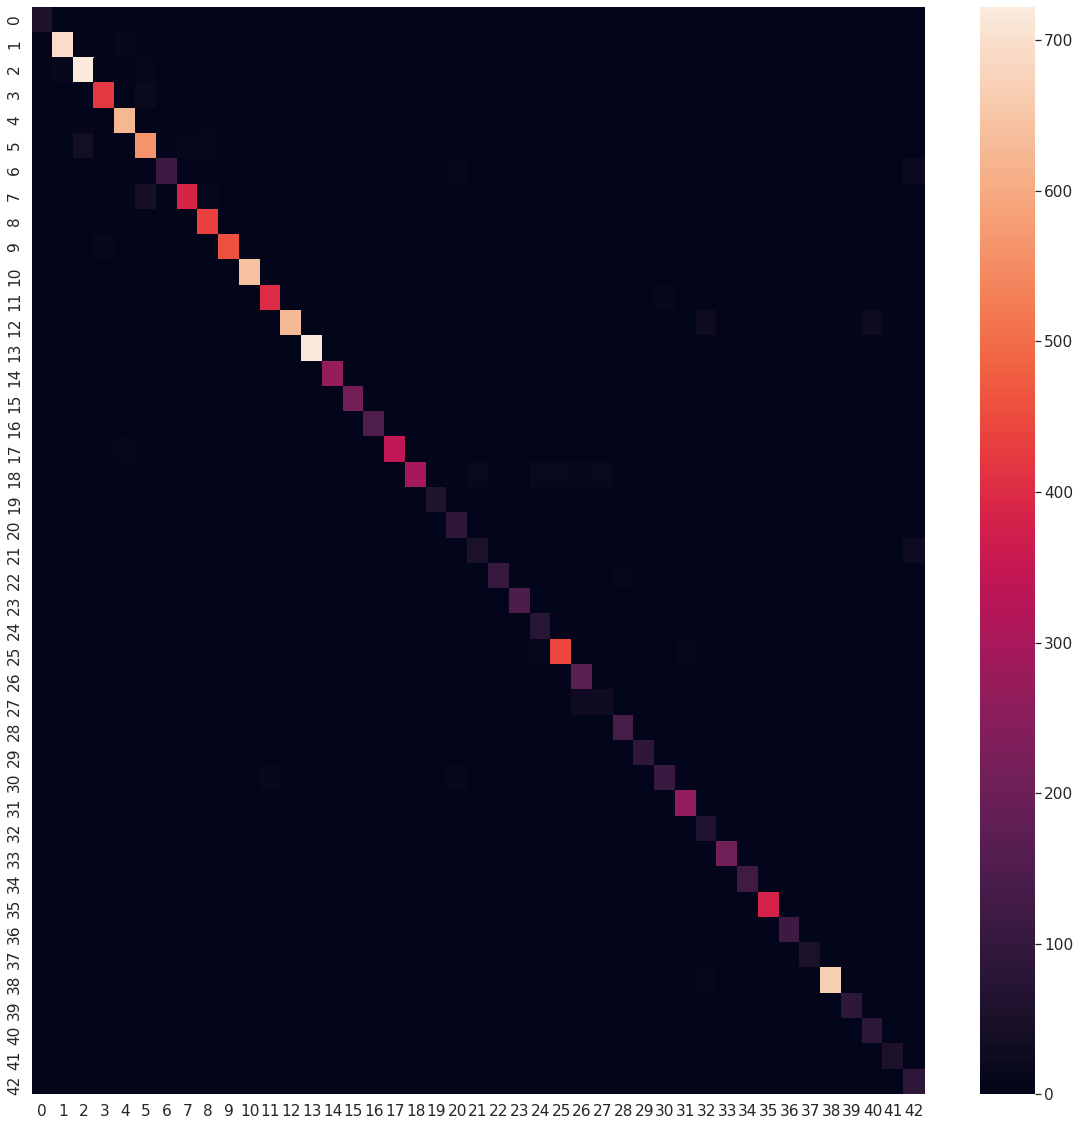

In [ ]:
df_cm = pd.DataFrame(conf14, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj14=classification_report(labele_test_conf14, labele_pred_conf14)

print(izvestaj14)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        60
           1       0.97      0.96      0.96       720
           2       0.91      0.96      0.94       750
           3       0.94      0.94      0.94       450
           4       0.96      0.95      0.95       660
           5       0.87      0.90      0.88       630
           6       0.97      0.77      0.86       150
           7       0.96      0.86      0.90       450
           8       0.91      0.97      0.94       450
           9       0.99      0.96      0.97       480
          10       0.98      0.98      0.98       660
          11       0.95      0.95      0.95       420
          12       0.97      0.91      0.94       690
          13       0.99      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.99      0.99      0.99       210
          16       0.97      0.99      0.98       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model15=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.0001)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history15 = model15.fit(slike_train_norm, labele_train_one_hot,batch_size=32,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 14s 11ms/step - loss: 7.6022 - accuracy: 0.1485 - val_loss: 1.2940 - val_accuracy: 0.6043
Epoch 2/30
1226/1226 [==============================] - 13s 11ms/step - loss: 1.5217 - accuracy: 0.7636 - val_loss: 0.6552 - val_accuracy: 0.8084
Epoch 3/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.4723 - accuracy: 0.9194 - val_loss: 0.5291 - val_accuracy: 0.8767
Epoch 4/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.2460 - accuracy: 0.9591 - val_loss: 0.4736 - val_accuracy: 0.8966
Epoch 5/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.1274 - accuracy: 0.9763 - val_loss: 0.3554 - val_accuracy: 0.9055
Epoch 6/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.1621 - accuracy: 0.9756 - val_loss: 0.3449 - val_accuracy: 0.9219
Epoch 7/30
1226/1226 [==============================] - 13s 11ms/step - loss: 0.0931 - accuracy: 0.9858 - val_loss: 0.3084 -

In [ ]:
labele_pred15=model15.predict(x=slike_test_norm)

In [ ]:
model15.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.2281 - accuracy: 0.9608


[0.22807149589061737, 0.9608076214790344]

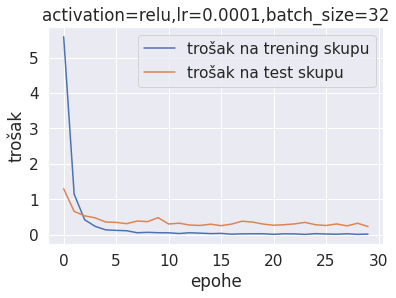

In [ ]:
train_losses15=history15.history["loss"]
test_losses15=history15.history["val_loss"]

plt.plot(train_losses15,label="trošak na trening skupu")
plt.plot(test_losses15,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=relu,lr=0.0001,batch_size=32")
plt.show()

In [ ]:
labele_pred_conf15=np.argmax(labele_pred15, axis=1)

labele_test_conf15=labele_test.reshape(labele_pred_conf15.shape[0],)

conf15=confusion_matrix(labele_test_conf15,labele_pred_conf15)

conf15

array([[ 60,   0,   0, ...,   0,   0,   0],
       [  2, 711,   2, ...,   0,   0,   0],
       [  0,   8, 738, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  87,   0,   0],
       [  0,   0,   0, ...,   0,  56,   0],
       [  0,   0,   0, ...,   0,   1,  86]])

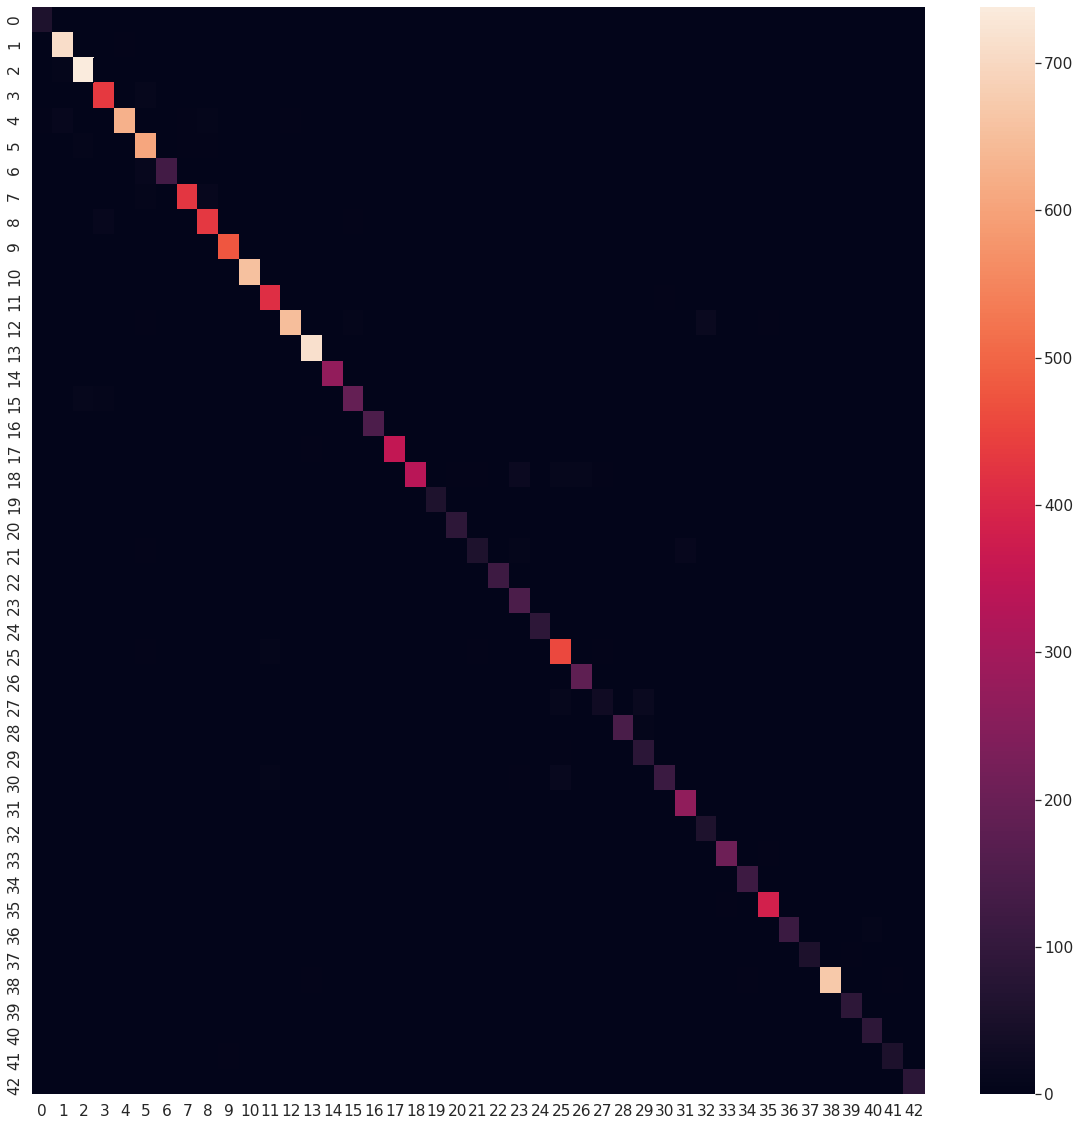

In [ ]:
df_cm = pd.DataFrame(conf15, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj15=classification_report(labele_test_conf15, labele_pred_conf15)

print(izvestaj15)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       0.96      0.99      0.98       720
           2       0.97      0.98      0.98       750
           3       0.95      0.96      0.95       450
           4       0.99      0.95      0.97       660
           5       0.93      0.97      0.95       630
           6       0.99      0.86      0.92       150
           7       0.98      0.95      0.96       450
           8       0.94      0.96      0.95       450
           9       0.99      1.00      0.99       480
          10       0.99      1.00      0.99       660
          11       0.95      0.98      0.97       420
          12       0.99      0.94      0.97       690
          13       0.98      1.00      0.99       720
          14       0.99      1.00      0.99       270
          15       0.93      0.92      0.92       210
          16       1.00      0.99      1.00       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model16=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.0001)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history16 = model16.fit(slike_train_norm, labele_train_one_hot, batch_size=256,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 8s 50ms/step - loss: 8.9013 - accuracy: 0.0378 - val_loss: 2.8919 - val_accuracy: 0.2253
Epoch 2/30
154/154 [==============================] - 8s 49ms/step - loss: 5.9368 - accuracy: 0.3120 - val_loss: 1.9974 - val_accuracy: 0.4565
Epoch 3/30
154/154 [==============================] - 8s 49ms/step - loss: 2.7934 - accuracy: 0.6255 - val_loss: 1.4628 - val_accuracy: 0.6224
Epoch 4/30
154/154 [==============================] - 8s 50ms/step - loss: 1.4023 - accuracy: 0.7901 - val_loss: 1.1628 - val_accuracy: 0.7229
Epoch 5/30
154/154 [==============================] - 8s 50ms/step - loss: 0.8522 - accuracy: 0.8615 - val_loss: 1.1759 - val_accuracy: 0.7129
Epoch 6/30
154/154 [==============================] - 8s 50ms/step - loss: 0.5781 - accuracy: 0.9016 - val_loss: 1.0672 - val_accuracy: 0.7793
Epoch 7/30
154/154 [==============================] - 8s 50ms/step - loss: 0.4808 - accuracy: 0.9188 - val_loss: 0.9603 - val_accuracy: 0.8017

In [ ]:
labele_pred16=model16.predict(x=slike_test_norm)

In [ ]:
model16.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.9296 - accuracy: 0.8851


[0.9295742511749268, 0.8851147890090942]

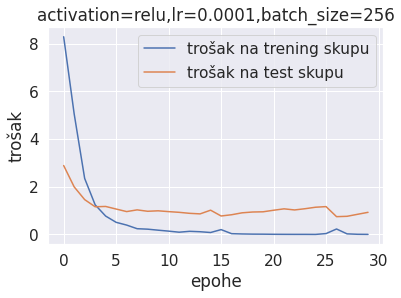

In [ ]:
train_losses16=history16.history["loss"]
test_losses16=history16.history["val_loss"]

plt.plot(train_losses16,label="trošak na trening skupu")
plt.plot(test_losses16,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=relu,lr=0.0001,batch_size=256")
plt.show()

In [ ]:
labele_pred_conf16=np.argmax(labele_pred16, axis=1)

labele_test_conf16=labele_test.reshape(labele_pred_conf16.shape[0],)

conf16=confusion_matrix(labele_test_conf16,labele_pred_conf16)

conf16

array([[ 43,  11,   0, ...,   0,   0,   0],
       [  0, 669,  14, ...,   0,   0,   0],
       [  0,  24, 706, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  56,   0,   0],
       [  0,   0,   0, ...,   0,  44,   6],
       [  0,   0,   0, ...,   0,   8,  72]])

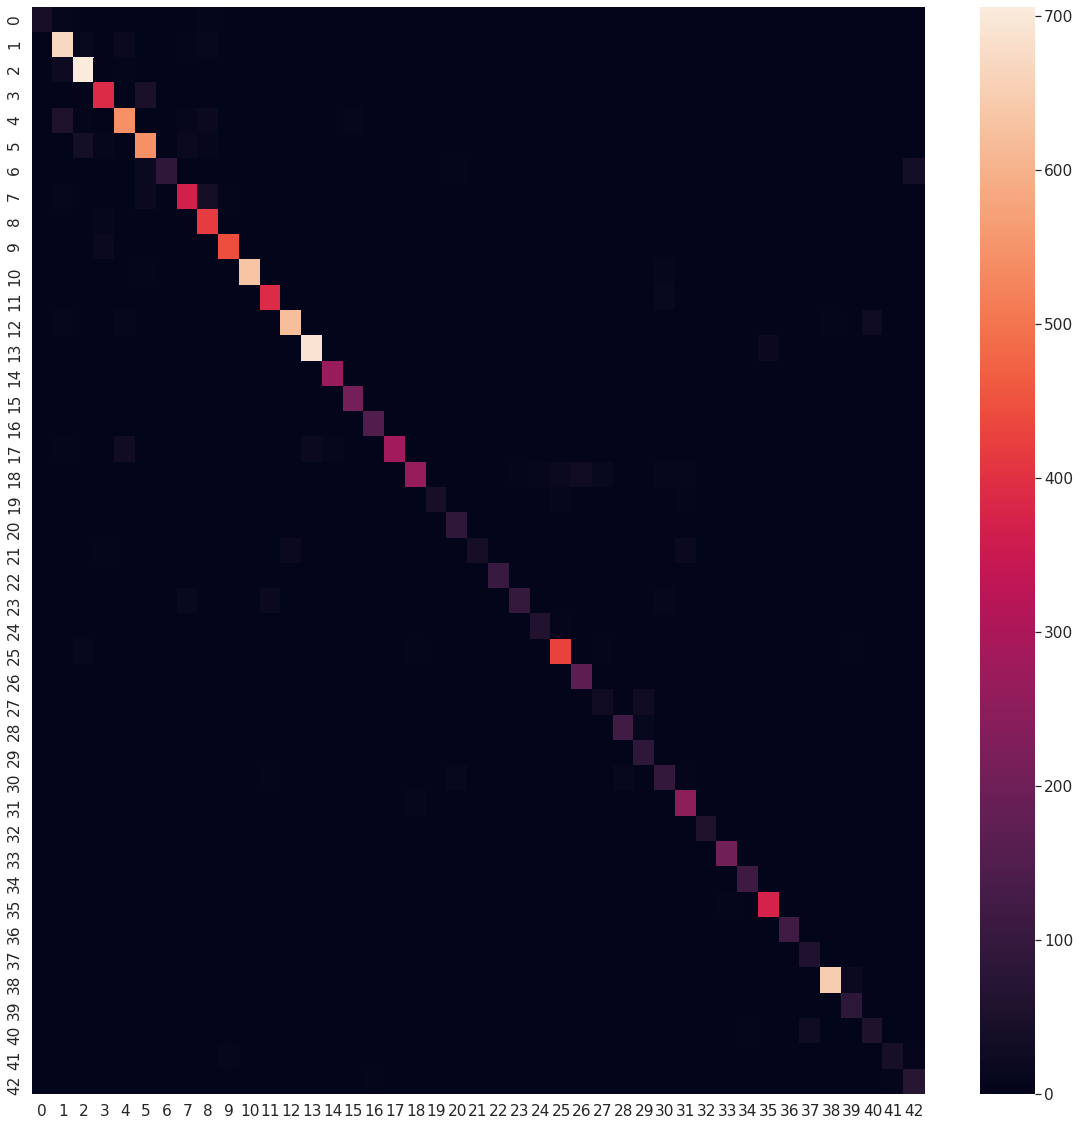

In [ ]:
df_cm = pd.DataFrame(conf16, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj16=classification_report(labele_test_conf16, labele_pred_conf16)

print(izvestaj16)

              precision    recall  f1-score   support

           0       0.98      0.72      0.83        60
           1       0.84      0.93      0.88       720
           2       0.89      0.94      0.91       750
           3       0.86      0.87      0.86       450
           4       0.88      0.83      0.85       660
           5       0.84      0.87      0.85       630
           6       0.96      0.59      0.73       150
           7       0.86      0.82      0.84       450
           8       0.82      0.93      0.87       450
           9       0.95      0.93      0.94       480
          10       0.99      0.96      0.97       660
          11       0.90      0.93      0.92       420
          12       0.95      0.90      0.92       690
          13       0.96      0.96      0.96       720
          14       0.94      1.00      0.97       270
          15       0.94      0.99      0.96       210
          16       0.93      0.98      0.95       150
          17       0.99    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model17=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.0001,activation="tanh")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history17 = model17.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 10s 31ms/step - loss: 7.3463 - accuracy: 0.2242 - val_loss: 1.3965 - val_accuracy: 0.6885
Epoch 2/30
307/307 [==============================] - 9s 31ms/step - loss: 2.1047 - accuracy: 0.8472 - val_loss: 0.6787 - val_accuracy: 0.8606
Epoch 3/30
307/307 [==============================] - 9s 31ms/step - loss: 0.7657 - accuracy: 0.9557 - val_loss: 0.4269 - val_accuracy: 0.9134
Epoch 4/30
307/307 [==============================] - 9s 31ms/step - loss: 0.3503 - accuracy: 0.9850 - val_loss: 0.3093 - val_accuracy: 0.9333
Epoch 5/30
307/307 [==============================] - 9s 31ms/step - loss: 0.1945 - accuracy: 0.9935 - val_loss: 0.2526 - val_accuracy: 0.9428
Epoch 6/30
307/307 [==============================] - 10s 31ms/step - loss: 0.1193 - accuracy: 0.9968 - val_loss: 0.2222 - val_accuracy: 0.9458
Epoch 7/30
307/307 [==============================] - 10s 31ms/step - loss: 0.0776 - accuracy: 0.9990 - val_loss: 0.1986 - val_accuracy: 0.9

In [ ]:
labele_pred17=model17.predict(x=slike_test_norm)

In [ ]:
model17.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 5ms/step - loss: 0.1347 - accuracy: 0.9649


[0.13467833399772644, 0.9649247527122498]

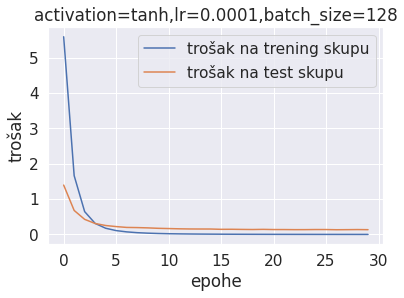

In [ ]:
train_losses17=history17.history["loss"]
test_losses17=history17.history["val_loss"]

plt.plot(train_losses17,label="trošak na trening skupu")
plt.plot(test_losses17,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=tanh,lr=0.0001,batch_size=128")
plt.show()

In [ ]:
labele_pred_conf17=np.argmax(labele_pred17, axis=1)

labele_test_conf17=labele_test.reshape(labele_pred_conf17.shape[0],)

conf17=confusion_matrix(labele_test_conf17,labele_pred_conf17)

conf17

(12630,)


array([[ 55,   5,   0, ...,   0,   0,   0],
       [  0, 709,   3, ...,   0,   0,   0],
       [  0,   9, 739, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  88,   0,   0],
       [  0,   0,   0, ...,   0,  51,   0],
       [  0,   0,   0, ...,   0,   0,  90]])

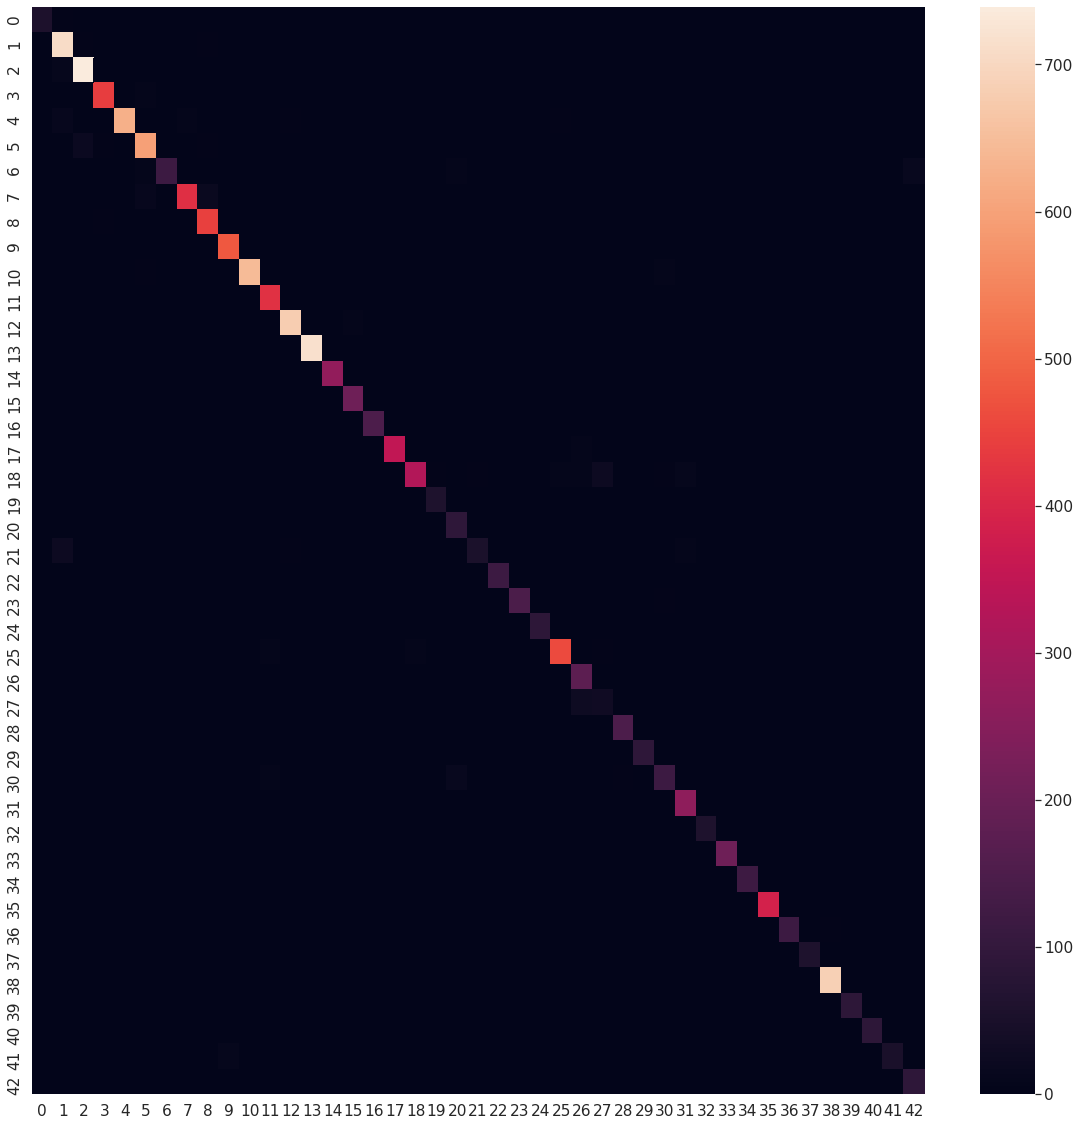

In [ ]:
df_cm = pd.DataFrame(conf17, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj17=classification_report(labele_test_conf17, labele_pred_conf17)

print(izvestaj17)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        60
           1       0.92      0.98      0.95       720
           2       0.96      0.99      0.97       750
           3       0.97      0.98      0.98       450
           4       1.00      0.95      0.97       660
           5       0.95      0.95      0.95       630
           6       1.00      0.78      0.88       150
           7       0.98      0.92      0.95       450
           8       0.94      0.99      0.96       450
           9       0.98      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.96      1.00      0.98       420
          12       0.98      0.99      0.98       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.97      1.00      0.99       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model18=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.0001,activation="tanh")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history18 = model18.fit(slike_train_norm, labele_train_one_hot, batch_size=64,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
613/613 [==============================] - 12s 19ms/step - loss: 6.4919 - accuracy: 0.3300 - val_loss: 0.9292 - val_accuracy: 0.8067
Epoch 2/30
613/613 [==============================] - 11s 18ms/step - loss: 1.1455 - accuracy: 0.9272 - val_loss: 0.4159 - val_accuracy: 0.9141
Epoch 3/30
613/613 [==============================] - 11s 18ms/step - loss: 0.3373 - accuracy: 0.9846 - val_loss: 0.2819 - val_accuracy: 0.9374
Epoch 4/30
613/613 [==============================] - 11s 18ms/step - loss: 0.1376 - accuracy: 0.9957 - val_loss: 0.2132 - val_accuracy: 0.9485
Epoch 5/30
613/613 [==============================] - 11s 18ms/step - loss: 0.0713 - accuracy: 0.9983 - val_loss: 0.1810 - val_accuracy: 0.9539
Epoch 6/30
613/613 [==============================] - 11s 18ms/step - loss: 0.0397 - accuracy: 0.9994 - val_loss: 0.1684 - val_accuracy: 0.9549
Epoch 7/30
613/613 [==============================] - 11s 18ms/step - loss: 0.0236 - accuracy: 0.9999 - val_loss: 0.1516 - val_accuracy:

In [ ]:
labele_pred18=model18.predict(x=slike_test_norm)

In [ ]:
model18.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 5ms/step - loss: 0.1316 - accuracy: 0.9693


[0.13161079585552216, 0.9692794680595398]

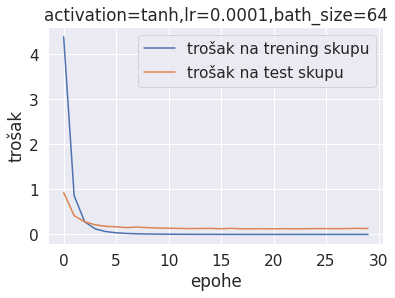

In [ ]:
train_losses18=history18.history["loss"]
test_losses18=history18.history["val_loss"]

plt.plot(train_losses18,label="trošak na trening skupu")
plt.plot(test_losses18,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=tanh,lr=0.0001,bath_size=64")
plt.show()

In [ ]:
labele_pred_conf18=np.argmax(labele_pred18, axis=1)

labele_test_conf18=labele_test.reshape(labele_pred_conf18.shape[0],)

conf18=confusion_matrix(labele_test_conf18,labele_pred_conf18)

conf18

array([[ 57,   3,   0, ...,   0,   0,   0],
       [  0, 710,   5, ...,   0,   0,   0],
       [  0,   8, 739, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  87,   0,   0],
       [  0,   0,   0, ...,   0,  52,   0],
       [  0,   0,   0, ...,   0,   1,  89]])

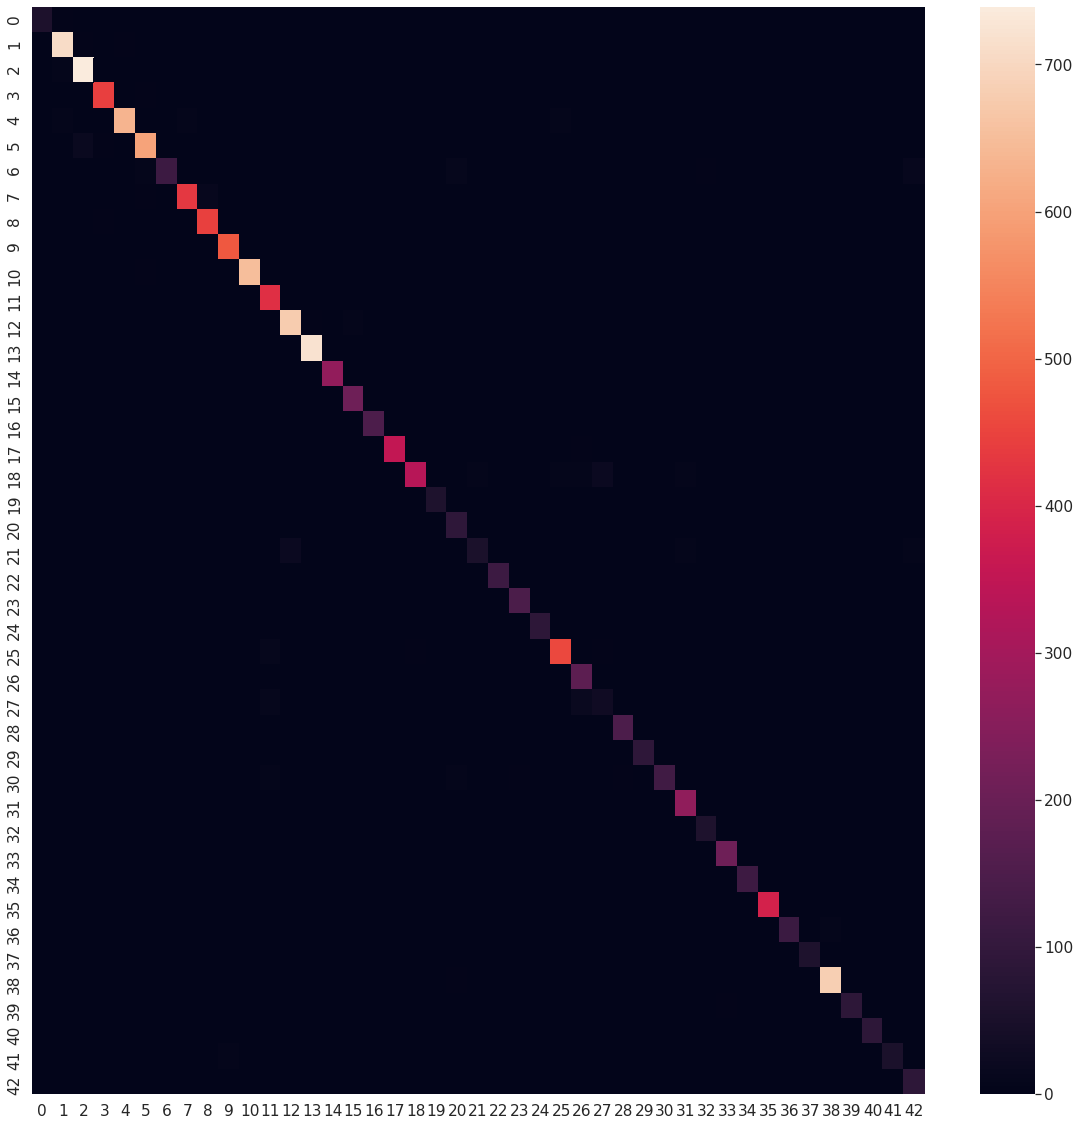

In [ ]:
df_cm = pd.DataFrame(conf18, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj18=classification_report(labele_test_conf18, labele_pred_conf18)

print(izvestaj18)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.97      0.99      0.98       720
           2       0.97      0.99      0.98       750
           3       0.98      0.98      0.98       450
           4       0.99      0.96      0.98       660
           5       0.96      0.96      0.96       630
           6       1.00      0.78      0.88       150
           7       0.98      0.96      0.97       450
           8       0.97      0.99      0.98       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.93      1.00      0.96       420
          12       0.96      0.98      0.97       690
          13       0.99      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.97      1.00      0.99       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model19=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.0001,activation="tanh")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history19 = model19.fit(slike_train_norm, labele_train_one_hot, batch_size=32,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
1226/1226 [==============================] - 15s 11ms/step - loss: 5.6764 - accuracy: 0.4262 - val_loss: 0.6031 - val_accuracy: 0.8849
Epoch 2/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.5672 - accuracy: 0.9690 - val_loss: 0.2676 - val_accuracy: 0.9413
Epoch 3/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.1400 - accuracy: 0.9955 - val_loss: 0.1998 - val_accuracy: 0.9470
Epoch 4/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.0487 - accuracy: 0.9988 - val_loss: 0.1627 - val_accuracy: 0.9565
Epoch 5/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.0228 - accuracy: 0.9996 - val_loss: 0.1677 - val_accuracy: 0.9538
Epoch 6/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.0163 - accuracy: 0.9990 - val_loss: 0.1786 - val_accuracy: 0.9504
Epoch 7/30
1226/1226 [==============================] - 14s 11ms/step - loss: 0.0206 - accuracy: 0.9987 - val_loss: 0.1269 -

In [ ]:
labele_pred19=model19.predict(x=slike_test_norm)

In [ ]:
model19.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 5ms/step - loss: 0.1355 - accuracy: 0.9731


[0.13550354540348053, 0.9730799794197083]

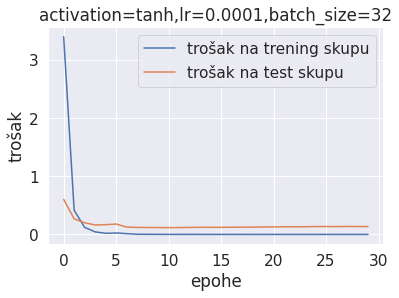

In [ ]:
train_losses19=history19.history["loss"]
test_losses19=history19.history["val_loss"]

plt.plot(train_losses19,label="trošak na trening skupu")
plt.plot(test_losses19,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("activation=tanh,lr=0.0001,batch_size=32")
plt.show()

In [ ]:
labele_pred_conf19=np.argmax(labele_pred19, axis=1)

labele_test_conf19=labele_test.reshape(labele_pred_conf19.shape[0],)

conf19=confusion_matrix(labele_test_conf19,labele_pred_conf19)

conf19

array([[ 56,   4,   0, ...,   0,   0,   0],
       [  0, 714,   1, ...,   0,   0,   0],
       [  0,   4, 742, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  87,   0,   0],
       [  0,   0,   0, ...,   0,  53,   0],
       [  0,   0,   0, ...,   0,   2,  88]])

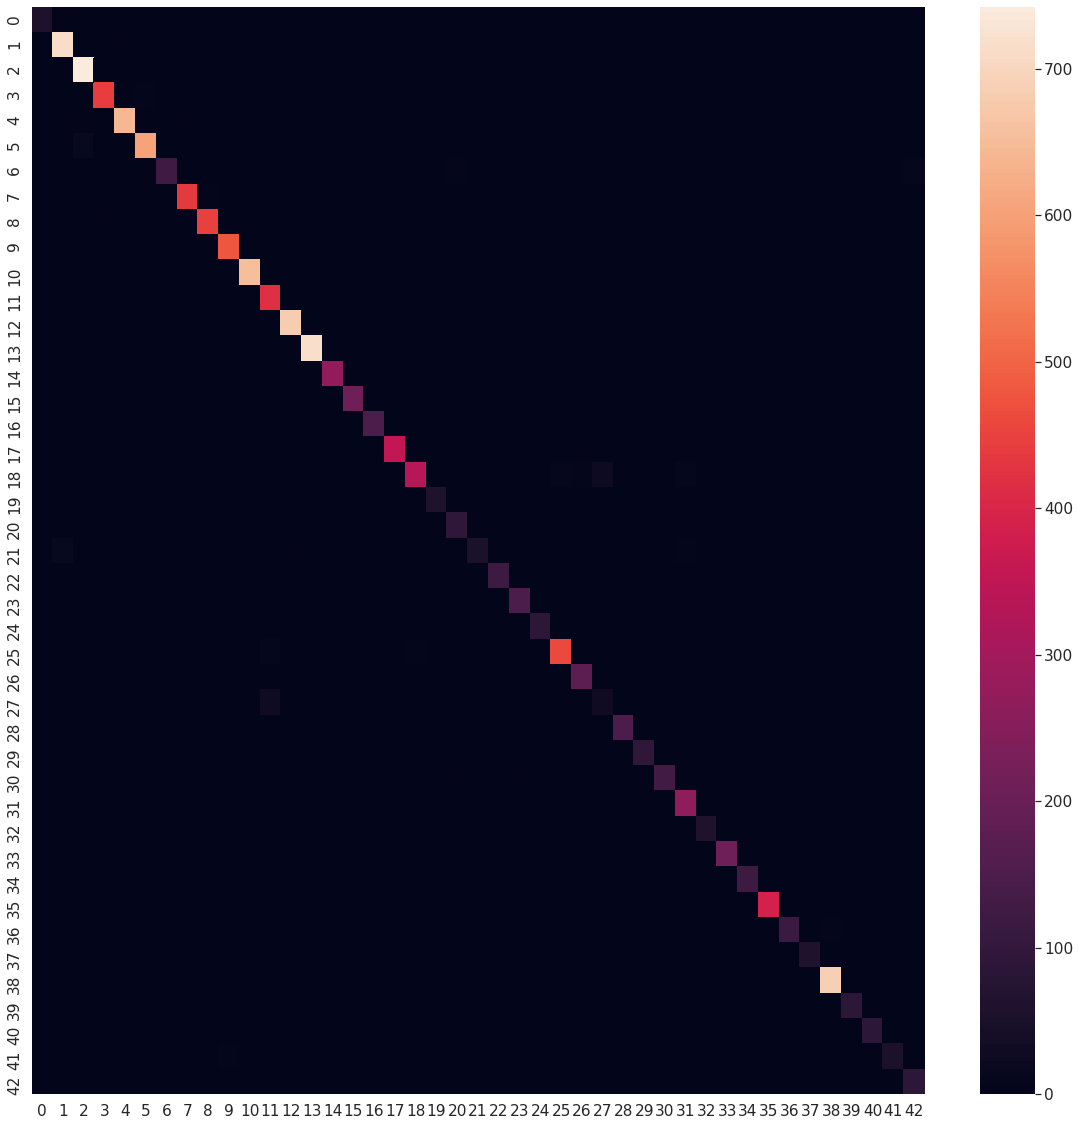

In [ ]:
df_cm = pd.DataFrame(conf19, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj19=classification_report(labele_test_conf19, labele_pred_conf19)

print(izvestaj19)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.95      0.99      0.97       720
           2       0.97      0.99      0.98       750
           3       0.98      0.98      0.98       450
           4       0.99      0.97      0.98       660
           5       0.97      0.96      0.97       630
           6       1.00      0.82      0.90       150
           7       0.98      0.97      0.98       450
           8       0.98      0.99      0.98       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      0.99       660
          11       0.90      1.00      0.95       420
          12       0.99      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.98      1.00      0.99       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model20=napravi_model_v1(slike_train_norm.shape[1:],L,learning_rate=0.0001,activation="tanh")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history20 = model20.fit(slike_train_norm, labele_train_one_hot, batch_size=256,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
154/154 [==============================] - 9s 58ms/step - loss: 8.0228 - accuracy: 0.1406 - val_loss: 1.9668 - val_accuracy: 0.5287
Epoch 2/30
154/154 [==============================] - 9s 57ms/step - loss: 3.5880 - accuracy: 0.6922 - val_loss: 1.1363 - val_accuracy: 0.7533
Epoch 3/30
154/154 [==============================] - 9s 57ms/step - loss: 1.6738 - accuracy: 0.8840 - val_loss: 0.7374 - val_accuracy: 0.8528
Epoch 4/30
154/154 [==============================] - 9s 58ms/step - loss: 0.8825 - accuracy: 0.9510 - val_loss: 0.5242 - val_accuracy: 0.8956
Epoch 5/30
154/154 [==============================] - 9s 58ms/step - loss: 0.5226 - accuracy: 0.9756 - val_loss: 0.4069 - val_accuracy: 0.9177
Epoch 6/30
154/154 [==============================] - 9s 58ms/step - loss: 0.3406 - accuracy: 0.9858 - val_loss: 0.3401 - val_accuracy: 0.9244
Epoch 7/30
154/154 [==============================] - 9s 57ms/step - loss: 0.2282 - accuracy: 0.9911 - val_loss: 0.2905 - val_accuracy: 0.9338

In [ ]:
labele_pred20=model20.predict(x=slike_test_norm)

In [ ]:
model20.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 5ms/step - loss: 0.1508 - accuracy: 0.9579


[0.15080220997333527, 0.957878053188324]

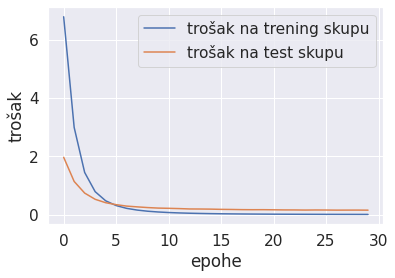

In [ ]:
train_losses20=history20.history["loss"]
test_losses20=history20.history["val_loss"]

plt.plot(train_losses20,label="trošak na trening skupu")
plt.plot(test_losses20,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.show()

In [ ]:
labele_pred_conf20=np.argmax(labele_pred20, axis=1)

labele_test_conf20=labele_test.reshape(labele_pred_conf20.shape[0],)

conf20=confusion_matrix(labele_test_conf20,labele_pred_conf20)

conf20

array([[ 53,   7,   0, ...,   0,   0,   0],
       [  0, 701,   6, ...,   0,   0,   0],
       [  0,  13, 734, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  87,   0,   0],
       [  0,   0,   0, ...,   0,  48,   0],
       [  0,   0,   0, ...,   0,   0,  90]])

In [ ]:
izvestaj20=classification_report(labele_test_conf20, labele_pred_conf20)

print(izvestaj20)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        60
           1       0.93      0.97      0.95       720
           2       0.96      0.98      0.97       750
           3       0.96      0.97      0.96       450
           4       0.99      0.95      0.97       660
           5       0.93      0.93      0.93       630
           6       1.00      0.75      0.85       150
           7       0.97      0.89      0.93       450
           8       0.90      0.98      0.94       450
           9       0.97      1.00      0.98       480
          10       1.00      0.98      0.99       660
          11       0.97      1.00      0.98       420
          12       0.97      0.98      0.97       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       1.00      0.99      1.00       150
          17       1.00    

In [ ]:
def napravi_model_v2(input_shape,broj_klasa,activation="relu",learning_rate=0.001,optimizer="adam"):

  model=Sequential()

  model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0),input_shape=input_shape))
  model.add(Activation(activation))
  model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same",kernel_initializer=keras.initializers.glorot_uniform(seed=0)))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(100,activation=activation))
  model.add(Dense(100,activation=activation))
  model.add(Dense(broj_klasa,activation="softmax"))

  model.compile(optimizer=optimizer,loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

  return model

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model21=napravi_model_v2(slike_train_norm.shape[1:],L,optimizer="sgd")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history21 = model21.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 9s 28ms/step - loss: 9.2672 - accuracy: 0.0140 - val_loss: 3.7508 - val_accuracy: 0.0160
Epoch 2/30
307/307 [==============================] - 9s 28ms/step - loss: 9.0879 - accuracy: 0.0295 - val_loss: 4.9451 - val_accuracy: 0.0217
Epoch 3/30
307/307 [==============================] - 9s 28ms/step - loss: 7.5554 - accuracy: 0.1576 - val_loss: 3.6597 - val_accuracy: 0.1608
Epoch 4/30
307/307 [==============================] - 9s 28ms/step - loss: 4.1025 - accuracy: 0.4818 - val_loss: 1.8309 - val_accuracy: 0.4997
Epoch 5/30
307/307 [==============================] - 9s 28ms/step - loss: 1.6106 - accuracy: 0.7575 - val_loss: 1.1890 - val_accuracy: 0.6982
Epoch 6/30
307/307 [==============================] - 9s 28ms/step - loss: 0.6838 - accuracy: 0.8861 - val_loss: 0.8619 - val_accuracy: 0.7865
Epoch 7/30
307/307 [==============================] - 8s 28ms/step - loss: 6.6113 - accuracy: 0.4288 - val_loss: 1.8682 - val_accuracy: 0.5006

In [ ]:
labele_pred21=model21.predict(x=slike_test_norm)

In [ ]:
model21.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.9700 - accuracy: 0.8960


[0.9699980616569519, 0.8959619998931885]

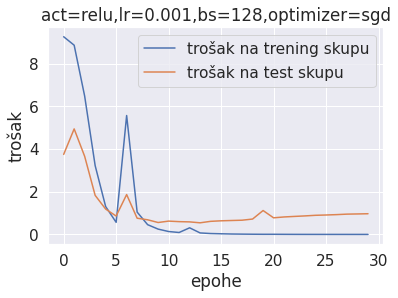

In [ ]:
train_losses21=history21.history["loss"]
test_losses21=history21.history["val_loss"]

plt.plot(train_losses21,label="trošak na trening skupu")
plt.plot(test_losses21,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("act=relu,lr=0.001,bs=128,optimizer=sgd")
plt.show()

In [ ]:
labele_pred_conf21=np.argmax(labele_pred21, axis=1)

labele_test_conf21=labele_test.reshape(labele_pred_conf21.shape[0],)

conf21=confusion_matrix(labele_test_conf21,labele_pred_conf21)

conf21

array([[ 32,  27,   0, ...,   0,   0,   0],
       [  4, 665,   9, ...,   0,   0,   0],
       [  0,  18, 712, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  83,   0,   0],
       [  0,   0,   0, ...,   0,  52,   1],
       [  0,   0,   0, ...,   0,  12,  77]])

In [ ]:
izvestaj21=classification_report(labele_test_conf21, labele_pred_conf21)

print(izvestaj21)

              precision    recall  f1-score   support

           0       0.86      0.53      0.66        60
           1       0.85      0.92      0.89       720
           2       0.87      0.95      0.91       750
           3       0.88      0.90      0.89       450
           4       0.91      0.87      0.89       660
           5       0.84      0.86      0.85       630
           6       1.00      0.68      0.81       150
           7       0.88      0.82      0.85       450
           8       0.85      0.91      0.88       450
           9       0.96      0.93      0.95       480
          10       0.96      0.96      0.96       660
          11       0.91      0.88      0.90       420
          12       0.96      0.90      0.93       690
          13       0.94      0.99      0.96       720
          14       1.00      0.99      0.99       270
          15       0.96      0.90      0.93       210
          16       0.99      0.98      0.98       150
          17       0.99    

In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model22=napravi_model_v2(slike_train_norm.shape[1:],L,optimizer="rmsprop")

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history22 = model22.fit(slike_train_norm, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_norm,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 17s 30ms/step - loss: 9.1005 - accuracy: 0.0327 - val_loss: 2.2009 - val_accuracy: 0.3499
Epoch 2/30
307/307 [==============================] - 9s 28ms/step - loss: 3.5066 - accuracy: 0.5279 - val_loss: 0.9193 - val_accuracy: 0.7622
Epoch 3/30
307/307 [==============================] - 9s 28ms/step - loss: 0.6585 - accuracy: 0.9042 - val_loss: 0.2956 - val_accuracy: 0.9293
Epoch 4/30
307/307 [==============================] - 9s 28ms/step - loss: 0.2266 - accuracy: 0.9688 - val_loss: 0.4859 - val_accuracy: 0.8918
Epoch 5/30
307/307 [==============================] - 9s 28ms/step - loss: 0.1472 - accuracy: 0.9799 - val_loss: 0.2040 - val_accuracy: 0.9549
Epoch 6/30
307/307 [==============================] - 9s 29ms/step - loss: 0.1546 - accuracy: 0.9843 - val_loss: 0.2479 - val_accuracy: 0.9547
Epoch 7/30
307/307 [==============================] - 9s 28ms/step - loss: 0.1077 - accuracy: 0.9893 - val_loss: 0.2489 - val_accuracy: 0.958

In [ ]:
labele_pred22=model22.predict(x=slike_test_norm)

In [ ]:
model22.evaluate(x=slike_test_norm,y=labele_test_one_hot)

395/395 [==============================] - 2s 4ms/step - loss: 0.6410 - accuracy: 0.9524


[0.6410347819328308, 0.952414870262146]

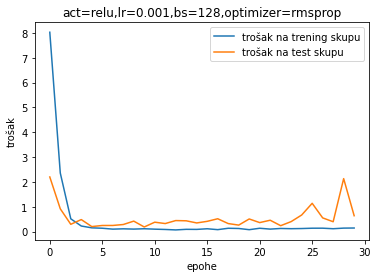

In [ ]:
train_losses22=history22.history["loss"]
test_losses22=history22.history["val_loss"]

plt.plot(train_losses22,label="trošak na trening skupu")
plt.plot(test_losses22,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("act=relu,lr=0.001,bs=128,optimizer=rmsprop")
plt.show()

In [ ]:
labele_pred_conf22=np.argmax(labele_pred22, axis=1)

labele_test_conf22=labele_test.reshape(labele_pred_conf22.shape[0],)

conf22=confusion_matrix(labele_test_conf22,labele_pred_conf22)

conf22

array([[ 59,   0,   0, ...,   0,   0,   0],
       [  7, 663,  10, ...,   2,   0,   0],
       [  0,   0, 745, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ...,  86,   0,   0],
       [  0,   0,   2, ...,   0,  49,   0],
       [  0,   0,   0, ...,   0,   0,  79]])

In [ ]:
izvestaj22=classification_report(labele_test_conf22, labele_pred_conf22)

print(izvestaj22)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        60
           1       1.00      0.92      0.96       720
           2       0.96      0.99      0.98       750
           3       0.93      0.98      0.95       450
           4       0.95      0.98      0.97       660
           5       0.95      0.96      0.95       630
           6       0.97      0.87      0.92       150
           7       0.99      0.97      0.98       450
           8       0.95      0.96      0.96       450
           9       0.97      0.99      0.98       480
          10       1.00      0.96      0.98       660
          11       0.92      0.95      0.93       420
          12       0.93      0.99      0.96       690
          13       0.99      0.98      0.99       720
          14       1.00      0.99      0.99       270
          15       1.00      0.96      0.98       210
          16       0.97      0.99      0.98       150
          17       1.00    

In [ ]:
def napravi_model_v3(input_shape,broj_klasa,activation="relu",learning_rate=0.001):

  model=Sequential()

  model.add(Dense(1000,activation=activation,input_shape=input_shape))
  model.add(Dense(1000,activation=activation))
  model.add(Dense(1000,activation=activation))
  model.add(Dense(1000,activation=activation))
  model.add(Dense(1000,activation=activation))
  model.add(Dense(1000,activation=activation))
  model.add(Dense(1000,activation=activation))
  model.add(Dense(1000,activation=activation))
  model.add(Dense(1000,activation=activation))
  model.add(Dense(broj_klasa,activation="softmax"))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

  return model

In [ ]:
feature_vector_length=slike_train.shape[1]*slike_train.shape[2]*3

In [ ]:
#slike_train.shape
slike_train_flatten=slike_train.reshape(slike_train.shape[0],-1).T
slike_test_flatten=slike_test.reshape(slike_test.shape[0],-1).T

In [ ]:
print(slike_train_flatten.shape)
print(slike_test_flatten.shape)

(2700, 39209)
(2700, 12630)


In [ ]:
np.random.seed(1)   
rn.seed(2)     
tf.compat.v1.set_random_seed(3)

model23=napravi_model_v3(slike_train_flatten.T.shape[1:],L)

np.random.seed(1)   
rn.seed(2)   
tf.compat.v1.set_random_seed(3)

history23 = model23.fit(slike_train_flatten.T, labele_train_one_hot, batch_size=128,shuffle=True, 
                    epochs=30, verbose=1, validation_data=(slike_test_flatten.T,labele_test_one_hot),class_weight=tezine)

Epoch 1/30
307/307 [==============================] - 3s 7ms/step - loss: 21.7807 - accuracy: 0.0428 - val_loss: 2.4698 - val_accuracy: 0.1898
Epoch 2/30
307/307 [==============================] - 2s 6ms/step - loss: 5.4886 - accuracy: 0.2445 - val_loss: 2.1612 - val_accuracy: 0.3089
Epoch 3/30
307/307 [==============================] - 2s 7ms/step - loss: 4.1608 - accuracy: 0.4194 - val_loss: 1.6019 - val_accuracy: 0.5079
Epoch 4/30
307/307 [==============================] - 2s 6ms/step - loss: 3.1175 - accuracy: 0.5622 - val_loss: 1.9447 - val_accuracy: 0.4882
Epoch 5/30
307/307 [==============================] - 2s 6ms/step - loss: 2.7623 - accuracy: 0.6153 - val_loss: 1.2495 - val_accuracy: 0.6731
Epoch 6/30
307/307 [==============================] - 2s 6ms/step - loss: 2.0726 - accuracy: 0.7010 - val_loss: 1.1470 - val_accuracy: 0.6641
Epoch 7/30
307/307 [==============================] - 2s 6ms/step - loss: 1.6525 - accuracy: 0.7547 - val_loss: 1.5321 - val_accuracy: 0.6075
Epoch

In [ ]:

labele_pred23=model23.predict(x=slike_test_flatten.T)

In [ ]:
model23.evaluate(x=slike_test_flatten.T,y=labele_test_one_hot)

395/395 [==============================] - 1s 3ms/step - loss: 0.8969 - accuracy: 0.8335


[0.8969107270240784, 0.8334916830062866]

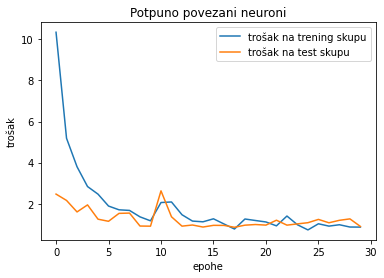

In [ ]:
train_losses23=history23.history["loss"]
test_losses23=history23.history["val_loss"]

plt.plot(train_losses23,label="trošak na trening skupu")
plt.plot(test_losses23,label="trošak na test skupu")
plt.xlabel("epohe")
plt.ylabel("trošak")
plt.legend(loc="upper right")
plt.title("Potpuno povezani neuroni")
plt.show()

In [ ]:
labele_pred_conf23=np.argmax(labele_pred23, axis=1)

labele_test_conf23=labele_test.reshape(labele_pred_conf23.shape[0],)

conf23=confusion_matrix(labele_test_conf23,labele_pred_conf23)

conf23

array([[ 28,   8,   0, ...,   0,   0,   0],
       [  4, 604,  35, ...,   1,   0,   0],
       [  0, 114, 549, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  54,   0,   1],
       [  0,   0,   0, ...,   0,  56,   0],
       [  0,   0,   0, ...,   0,   3,  81]])

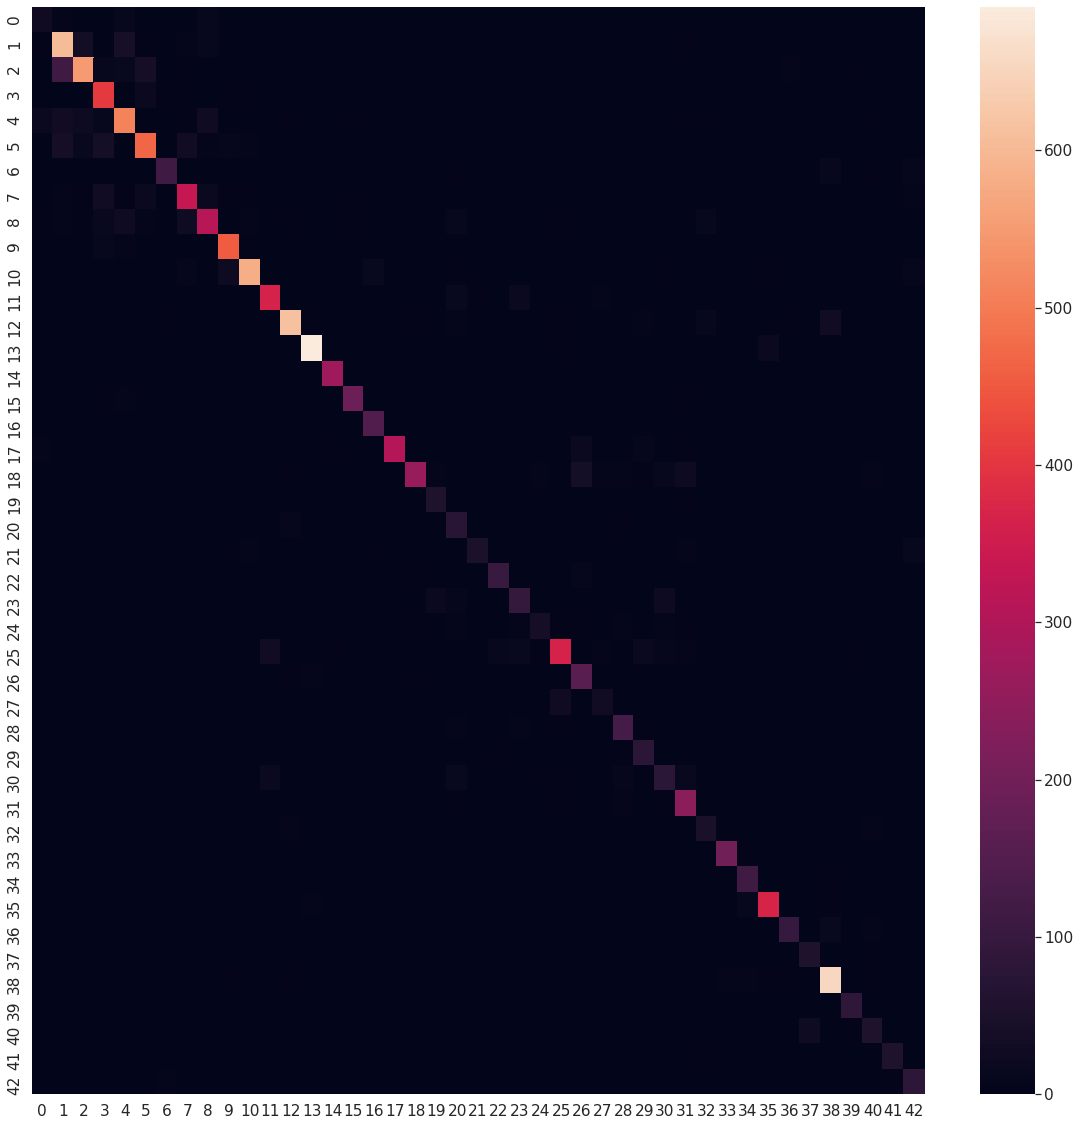

In [ ]:
df_cm = pd.DataFrame(conf23, range(L), range(L))
plt.figure(figsize=(20,20))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm) 

plt.show()

In [ ]:
izvestaj23=classification_report(labele_test_conf23, labele_pred_conf23)

print(izvestaj23)

              precision    recall  f1-score   support

           0       0.43      0.47      0.45        60
           1       0.75      0.84      0.79       720
           2       0.86      0.73      0.79       750
           3       0.76      0.90      0.82       450
           4       0.81      0.78      0.79       660
           5       0.84      0.74      0.79       630
           6       0.88      0.77      0.82       150
           7       0.80      0.74      0.77       450
           8       0.79      0.70      0.74       450
           9       0.89      0.95      0.92       480
          10       0.93      0.88      0.90       660
          11       0.87      0.87      0.87       420
          12       0.94      0.89      0.91       690
          13       0.96      0.96      0.96       720
          14       0.96      1.00      0.98       270
          15       0.90      0.90      0.90       210
          16       0.86      0.97      0.91       150
          17       1.00    

In [ ]:
model23.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1000)              2701000   
_________________________________________________________________
dense_54 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_55 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_56 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_57 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_58 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_59 (Dense)             (None, 1000)             

In [ ]:
model_v1=napravi_model_v1(slike_train_norm.shape[1:],L)

In [ ]:
model_v1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
activation_9 (Activation)    (None, 15, 15, 128)      